# Project : Climate Change through Temperature Change

### Problem Statement

The Food and Agriculture Organization of the United Nations is a specialized agency of the United Nations that leads international efforts to defeat hunger and improve nutrition and food security. 
Increases in surface air temperature associated with rising greenhouse gas concentrations threaten plant growth and yield, putting millions of farmers and communities at risk throughout the world. 
Together with changes in precipitation and increases in extreme events such as flooding and droughts, climate change threatens countries’ food security, and their ability to eradicate poverty and achieve sustainable development. 

This project will  focus on building a Time series model that will predict and forecast the Temperature change  for the next 15 years  using a dataset from FAOSTAT on temperature change .
This model  will shows  the trends and will allow an understanding  of impacts of climate change challenges on Agriculture.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Modeling](#Modeling)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

### Background

The dataset is a combination of a dataset of temperature change from  Kaggle (https://www.kaggle.com/sevgisarac/temperature-change) and a dataset of countries with regional codes from (https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv).


The FAOSTAT Temperature Change domain disseminates statistics of mean surface temperature change by country, with annual updates. The current dissemination covers the period 1961–2020. Statistics are available for monthly, seasonal and annual mean temperature anomalies, i.e., temperature change with respect to a baseline climatology, corresponding to the period 1951–1980. The standard deviation of the temperature change of the baseline methodology is also available. Data are based on the publicly available GISTEMP data, the Global Surface Temperature Change data distributed by the National Aeronautics and Space Administration Goddard Institute for Space Studies (NASA-GISS).

Content
Statistical concepts and definitions

Statistical standards: Data in the Temperature Change domain are not an explicit SEEA variable. Nonetheless, country and regional calculations employ a definition of “Land area” consistent with SEEA Land Use definitions, specifically SEEA CF Table 5.11 “Land Use Classification” and SEEA AFF Table 4.8, “Physical asset account for land use.” The Temperature Change domain of the FAOSTAT Agri-Environmental Indicators section is compliant with the Framework for the Development of Environmental Statistics (FDES 2013), contributing to FDES Component 1: Environmental Conditions and Quality, Sub-component 1.1: Physical Conditions, Topic 1.1.1: Atmosphere, climate and weather, Core set/ Tier 1 statistics a.1.

Statistical unit: Countries and Territories.

Statistical population: Countries and Territories.

Reference area: Area of all the Countries and Territories of the world. In 2019: 190 countries and 37 other territorial entities.

Code - reference area: FAOSTAT, M49, ISO2 and ISO3 (http://www.fao.org/faostat/en/#definitions). FAO Global Administrative Unit Layer (GAUL National level – reference year 2014. FAO Geospatial data repository GeoNetwork. Permanent address: http://www.fao.org:80/geonetwork?uuid=f7e7adb0-88fd-11da-a88f-000d939bc5d8.

Code - Number of countries/areas covered: In 2019: 190 countries and 37 other territorial entities.

Time coverage: 1961-2020

Periodicity: Monthly, Seasonal, Yearly

Base period: 1951-1980

Unit of Measure: Celsius degrees °C

Reference period: Months, Seasons, Meteorological year

Region  of countries and territories

Subregion of countries and territories

### Data Import and Cleaning

From the Temperature Change dataset , we did some cleaning and removed the data from 3 months period and the meteorological year so that we can have the data for every month.

Next, we looked at the missing values in the columns of months and found missing values. We decided to remove the row without the months and where the value is missing replace it with 0. We combined the month and year columns to create a new column date.

After the cleaning process, we removed the unnecessary columns and combined the new data frame with the dataset that has region and subregion to a single data frame. We saved the Data frame to a new .csv file.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
### Importing the dataset from a .csv file
data = pd.read_csv('./data/FAOSTAT_data_1-10-2022.csv')
data.head()

Domain Code              Domain  Area Code (FAO)         Area  Element Code  \
0          ET  Temperature change                2  Afghanistan          7271   
1          ET  Temperature change                2  Afghanistan          7271   
2          ET  Temperature change                2  Afghanistan          7271   
3          ET  Temperature change                2  Afghanistan          7271   
4          ET  Temperature change                2  Afghanistan          7271   

              Element  Months Code   Months  Year Code  Year Unit  Value Flag  \
0  Temperature change         7001  January       1961  1961   ?C  0.746   Fc   
1  Temperature change         7001  January       1962  1962   ?C  0.009   Fc   
2  Temperature change         7001  January       1963  1963   ?C  2.695   Fc   
3  Temperature change         7001  January       1964  1964   ?C -5.277   Fc   
4  Temperature change         7001  January       1965  1965   ?C  1.827   Fc   

  Flag Description  
0  Calculated data  
1  Calculated data  
2  Calculated data  
3  Calculated data  
4  Calculated data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229925 entries, 0 to 229924
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       229925 non-null  object 
 1   Domain            229925 non-null  object 
 2   Area Code (FAO)   229925 non-null  int64  
 3   Area              229925 non-null  object 
 4   Element Code      229925 non-null  int64  
 5   Element           229925 non-null  object 
 6   Months Code       229925 non-null  int64  
 7   Months            229925 non-null  object 
 8   Year Code         229925 non-null  int64  
 9   Year              229925 non-null  int64  
 10  Unit              229925 non-null  object 
 11  Value             222012 non-null  float64
 12  Flag              229925 non-null  object 
 13  Flag Description  229925 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 24.6+ MB


In [5]:
#renaming the columns to lower case 
data = data.rename(columns=lambda s: s.replace(' ','_').lower())


In [6]:
# a statistical summury of the dataset 
data.describe(include='all')

domain_code              domain  area_code_(fao)         area  \
count       229925              229925    229925.000000       229925   
unique           1                   1              NaN          247   
top             ET  Temperature change              NaN  Afghanistan   
freq        229925              229925              NaN         1020   
mean           NaN                 NaN       130.647689          NaN   
std            NaN                 NaN        76.809008          NaN   
min            NaN                 NaN         1.000000          NaN   
25%            NaN                 NaN        64.000000          NaN   
50%            NaN                 NaN       131.000000          NaN   
75%            NaN                 NaN       194.000000          NaN   
max            NaN                 NaN       351.000000          NaN   

        element_code             element    months_code   months  \
count       229925.0              229925  229925.000000   229925   
unique           NaN                   1            NaN       17   
top              NaN  Temperature change            NaN  January   
freq             NaN              229925            NaN    13525   
mean          7271.0                 NaN    7009.882353      NaN   
std              0.0                 NaN       6.037955      NaN   
min           7271.0                 NaN    7001.000000      NaN   
25%           7271.0                 NaN    7005.000000      NaN   
50%           7271.0                 NaN    7009.000000      NaN   
75%           7271.0                 NaN    7016.000000      NaN   
max           7271.0                 NaN    7020.000000      NaN   

            year_code           year    unit          value    flag  \
count   229925.000000  229925.000000  229925  222012.000000  229925   
unique            NaN            NaN       1            NaN       2   
top               NaN            NaN      ?C            NaN      Fc   
freq              NaN            NaN  229925            NaN  222012   
mean      1991.306248    1991.306248     NaN       0.492626     NaN   
std         17.333252      17.333252     NaN       1.036364     NaN   
min       1961.000000    1961.000000     NaN      -9.303000     NaN   
25%       1976.000000    1976.000000     NaN      -0.071000     NaN   
50%       1992.000000    1992.000000     NaN       0.414000     NaN   
75%       2006.000000    2006.000000     NaN       0.999000     NaN   
max       2020.000000    2020.000000     NaN      11.759000     NaN   

       flag_description  
count            229925  
unique                2  
top     Calculated data  
freq             222012  
mean                NaN  
std                 NaN  
min                 NaN  
25%                 NaN  
50%                 NaN  
75%                 NaN  
max                 NaN

In [7]:
###looking at the count of the unique value of the months column
data['months'].value_counts()

January                13525
October                13525
Sep?Oct?Nov            13525
Jun?Jul?Aug            13525
Mar?Apr?May            13525
Dec?Jan?Feb            13525
December               13525
November               13525
September              13525
February               13525
August                 13525
July                   13525
June                   13525
May                    13525
April                  13525
March                  13525
Meteorological year    13525
Name: months, dtype: int64

In [8]:
data['months'].loc[data['months'].isin(['Sep?Oct?Nov','Meteorological year','Mar?Apr?May','Dec?Jan?Feb','Jun?Jul?Aug'])]

720               Dec?Jan?Feb
721               Dec?Jan?Feb
722               Dec?Jan?Feb
723               Dec?Jan?Feb
724               Dec?Jan?Feb
                 ...         
229920    Meteorological year
229921    Meteorological year
229922    Meteorological year
229923    Meteorological year
229924    Meteorological year
Name: months, Length: 67625, dtype: object

In [9]:
#We are removing from the months , the 3 months aggregation and meteorological year.

data['months'] = data['months'].loc[~data['months'].isin(['Sep?Oct?Nov','Meteorological year','Mar?Apr?May','Dec?Jan?Feb','Jun?Jul?Aug'])]

In [10]:
data['months'].value_counts()

January      13525
February     13525
March        13525
April        13525
May          13525
June         13525
July         13525
August       13525
September    13525
October      13525
November     13525
December     13525
Name: months, dtype: int64

In [11]:
## looking at null values in the dataset
data.isnull().sum()

domain_code             0
domain                  0
area_code_(fao)         0
area                    0
element_code            0
element                 0
months_code             0
months              67625
year_code               0
year                    0
unit                    0
value                7913
flag                    0
flag_description        0
dtype: int64

In [12]:
data.shape

(229925, 14)

In [13]:
data.loc[data['months'].isnull()]

domain_code              domain  area_code_(fao)         area  \
720             ET  Temperature change                2  Afghanistan   
721             ET  Temperature change                2  Afghanistan   
722             ET  Temperature change                2  Afghanistan   
723             ET  Temperature change                2  Afghanistan   
724             ET  Temperature change                2  Afghanistan   
...            ...                 ...              ...          ...   
229920          ET  Temperature change              181     Zimbabwe   
229921          ET  Temperature change              181     Zimbabwe   
229922          ET  Temperature change              181     Zimbabwe   
229923          ET  Temperature change              181     Zimbabwe   
229924          ET  Temperature change              181     Zimbabwe   

        element_code             element  months_code months  year_code  year  \
720             7271  Temperature change         7016    NaN       1961  1961   
721             7271  Temperature change         7016    NaN       1962  1962   
722             7271  Temperature change         7016    NaN       1963  1963   
723             7271  Temperature change         7016    NaN       1964  1964   
724             7271  Temperature change         7016    NaN       1965  1965   
...              ...                 ...          ...    ...        ...   ...   
229920          7271  Temperature change         7020    NaN       2016  2016   
229921          7271  Temperature change         7020    NaN       2017  2017   
229922          7271  Temperature change         7020    NaN       2018  2018   
229923          7271  Temperature change         7020    NaN       2019  2019   
229924          7271  Temperature change         7020    NaN       2020  2020   

       unit  value flag flag_description  
720      ?C -0.751   Fc  Calculated data  
721      ?C  0.985   Fc  Calculated data  
722      ?C  1.931   Fc  Calculated data  
723      ?C -2.056   Fc  Calculated data  
724      ?C -0.669   Fc  Calculated data  
...     ...    ...  ...              ...  
229920   ?C  1.470   Fc  Calculated data  
229921   ?C  0.443   Fc  Calculated data  
229922   ?C  0.747   Fc  Calculated data  
229923   ?C  1.359   Fc  Calculated data  
229924   ?C  0.820   Fc  Calculated data  

[67625 rows x 14 columns]

In [14]:
data.loc[data['value'].isnull()]

domain_code              domain  area_code_(fao)            area  \
3097            ET  Temperature change                5  American Samoa   
3109            ET  Temperature change                5  American Samoa   
3157            ET  Temperature change                5  American Samoa   
3217            ET  Temperature change                5  American Samoa   
3276            ET  Temperature change                5  American Samoa   
...            ...                 ...              ...             ...   
227354          ET  Temperature change              249           Yemen   
227355          ET  Temperature change              249           Yemen   
227356          ET  Temperature change              249           Yemen   
227357          ET  Temperature change              249           Yemen   
227920          ET  Temperature change              251          Zambia   

        element_code             element  months_code    months  year_code  \
3097            7271  Temperature change         7001   January       1998   
3109            7271  Temperature change         7001   January       2010   
3157            7271  Temperature change         7002  February       1998   
3217            7271  Temperature change         7003     March       1998   
3276            7271  Temperature change         7004     April       1997   
...              ...                 ...          ...       ...        ...   
227354          7271  Temperature change         7020       NaN       2017   
227355          7271  Temperature change         7020       NaN       2018   
227356          7271  Temperature change         7020       NaN       2019   
227357          7271  Temperature change         7020       NaN       2020   
227920          7271  Temperature change         7001   January       1996   

        year unit  value flag    flag_description  
3097    1998   ?C    NaN   NV  Data not available  
3109    2010   ?C    NaN   NV  Data not available  
3157    1998   ?C    NaN   NV  Data not available  
3217    1998   ?C    NaN   NV  Data not available  
3276    1997   ?C    NaN   NV  Data not available  
...      ...  ...    ...  ...                 ...  
227354  2017   ?C    NaN   NV  Data not available  
227355  2018   ?C    NaN   NV  Data not available  
227356  2019   ?C    NaN   NV  Data not available  
227357  2020   ?C    NaN   NV  Data not available  
227920  1996   ?C    NaN   NV  Data not available  

[7913 rows x 14 columns]

In [15]:
data.loc[(data['value'].isnull()) & (data['area'] == 'American Samoa')]

domain_code              domain  area_code_(fao)            area  \
3097          ET  Temperature change                5  American Samoa   
3109          ET  Temperature change                5  American Samoa   
3157          ET  Temperature change                5  American Samoa   
3217          ET  Temperature change                5  American Samoa   
3276          ET  Temperature change                5  American Samoa   
3277          ET  Temperature change                5  American Samoa   
3336          ET  Temperature change                5  American Samoa   
3337          ET  Temperature change                5  American Samoa   
3348          ET  Temperature change                5  American Samoa   
3396          ET  Temperature change                5  American Samoa   
3397          ET  Temperature change                5  American Samoa   
3456          ET  Temperature change                5  American Samoa   
3457          ET  Temperature change                5  American Samoa   
3468          ET  Temperature change                5  American Samoa   
3516          ET  Temperature change                5  American Samoa   
3517          ET  Temperature change                5  American Samoa   
3528          ET  Temperature change                5  American Samoa   
3576          ET  Temperature change                5  American Samoa   
3577          ET  Temperature change                5  American Samoa   
3588          ET  Temperature change                5  American Samoa   
3636          ET  Temperature change                5  American Samoa   
3637          ET  Temperature change                5  American Samoa   
3648          ET  Temperature change                5  American Samoa   
3696          ET  Temperature change                5  American Samoa   
3697          ET  Temperature change                5  American Samoa   
3708          ET  Temperature change                5  American Samoa   
3756          ET  Temperature change                5  American Samoa   
3768          ET  Temperature change                5  American Samoa   
3817          ET  Temperature change                5  American Samoa   
3829          ET  Temperature change                5  American Samoa   
3876          ET  Temperature change                5  American Samoa   
3877          ET  Temperature change                5  American Samoa   
3936          ET  Temperature change                5  American Samoa   
3937          ET  Temperature change                5  American Samoa   
3948          ET  Temperature change                5  American Samoa   
3996          ET  Temperature change                5  American Samoa   
3997          ET  Temperature change                5  American Samoa   
4008          ET  Temperature change                5  American Samoa   
4056          ET  Temperature change                5  American Samoa   
4057          ET  Temperature change                5  American Samoa   
4068          ET  Temperature change                5  American Samoa   

      element_code             element  months_code     months  year_code  \
3097          7271  Temperature change         7001    January       1998   
3109          7271  Temperature change         7001    January       2010   
3157          7271  Temperature change         7002   February       1998   
3217          7271  Temperature change         7003      March       1998   
3276          7271  Temperature change         7004      April       1997   
3277          7271  Temperature change         7004      April       1998   
3336          7271  Temperature change         7005        May       1997   
3337          7271  Temperature change         7005        May       1998   
3348          7271  Temperature change         7005        May       2009   
3396          7271  Temperature change         7006       June       1997   
3397          7271  Temperature change         7006       June       1998   
3456          

In [16]:
# we are going to drop the missing values from the months because they appear to be yearly aggregate 
data = data.dropna(subset=['months'])

In [17]:
data.isnull().sum()

domain_code            0
domain                 0
area_code_(fao)        0
area                   0
element_code           0
element                0
months_code            0
months                 0
year_code              0
year                   0
unit                   0
value               5619
flag                   0
flag_description       0
dtype: int64

In [18]:
# we have around 5000 missing values in 'value', we are assuming the value is equal to zero , ### why?
data['value'] = np.where(data['value'].isnull() == True,0 ,data['value'])

In [19]:
data.isnull().sum()

domain_code         0
domain              0
area_code_(fao)     0
area                0
element_code        0
element             0
months_code         0
months              0
year_code           0
year                0
unit                0
value               0
flag                0
flag_description    0
dtype: int64

In [20]:
data.shape

(162300, 14)

In [21]:
### Creating a date column
data['date'] = ''
for i in data.index:
    data['date'][i] = data['months'][i] + ' ' + str(data['year'][i]);

In [22]:
### converting date column to datetime
data['date']= pd.to_datetime(data.date)

In [23]:
data.dtypes

domain_code                 object
domain                      object
area_code_(fao)              int64
area                        object
element_code                 int64
element                     object
months_code                  int64
months                      object
year_code                    int64
year                         int64
unit                        object
value                      float64
flag                        object
flag_description            object
date                datetime64[ns]
dtype: object

In [24]:
### removing  columns we don't want to use ### maybe we can create a copy of the dataset ?
data= data[['date','value','area_code_(fao)','area']]
data.head()

date  value  area_code_(fao)         area
0 1961-01-01  0.746                2  Afghanistan
1 1962-01-01  0.009                2  Afghanistan
2 1963-01-01  2.695                2  Afghanistan
3 1964-01-01 -5.277                2  Afghanistan
4 1965-01-01  1.827                2  Afghanistan

In [25]:
### Cleaning up country names with corrupt data

data['area'] = np.where(data['area'] == 'R?union','Réunion', data['area'])

data["area"] = np.where(data["area"] == "C?te d'Ivoire","Côte d'Ivoire", data["area"])

In [26]:
country_region = pd.read_csv('./data/Country_Regions.csv')

In [27]:
country_region.head(10)

country iso2 iso3      region                        subregion
0          Afghanistan   AF  AFG        Asia                    Southern Asia
1        Åland Islands   AX  ALA      Europe                  Northern Europe
2              Albania   AL  ALB      Europe                  Southern Europe
3              Algeria   DZ  DZA      Africa                  Northern Africa
4       American Samoa   AS  ASM     Oceania                        Polynesia
5              Andorra   AD  AND      Europe                  Southern Europe
6               Angola   AO  AGO      Africa               Sub-Saharan Africa
7             Anguilla   AI  AIA    Americas  Latin America and the Caribbean
8           Antarctica   AQ  ATA  Antarctica                       Antarctica
9  Antigua and Barbuda   AG  ATG    Americas  Latin America and the Caribbean

In [28]:
### creating a dictionary of countries with regions and subregions
region_dict = dict()
for i in country_region.index:
     region_dict[country_region['country'][i]] = (country_region['region'][i], country_region['subregion'][i])

In [29]:
region_dict

{'Afghanistan': ('Asia', 'Southern Asia'),
 'Åland Islands': ('Europe', 'Northern Europe'),
 'Albania': ('Europe', 'Southern Europe'),
 'Algeria': ('Africa', 'Northern Africa'),
 'American Samoa': ('Oceania', 'Polynesia'),
 'Andorra': ('Europe', 'Southern Europe'),
 'Angola': ('Africa', 'Sub-Saharan Africa'),
 'Anguilla': ('Americas', 'Latin America and the Caribbean'),
 'Antarctica': ('Antarctica', 'Antarctica'),
 'Antigua and Barbuda': ('Americas', 'Latin America and the Caribbean'),
 'Argentina': ('Americas', 'Latin America and the Caribbean'),
 'Armenia': ('Asia', 'Western Asia'),
 'Aruba': ('Americas', 'Latin America and the Caribbean'),
 'Australia': ('Oceania', 'Australia and New Zealand'),
 'Austria': ('Europe', 'Western Europe'),
 'Azerbaijan': ('Asia', 'Western Asia'),
 'Bahamas': ('Americas', 'Latin America and the Caribbean'),
 'Bahrain': ('Asia', 'Western Asia'),
 'Bangladesh': ('Asia', 'Southern Asia'),
 'Barbados': ('Americas', 'Latin America and the Caribbean'),
 'Belar

In [30]:
### add region and subregion columns to the dataframe using  the region dictionary
data['region'] = ''
data['subregion'] = ''
for i in data.index:
    ##if data['area'][i] in region_dict.keys():
        data['region'][i] = region_dict[data['area'][i]][0]
        data['subregion'][i] = region_dict[data['area'][i]][1]

In [31]:
### every feature now has a region
data.loc[data['region'] == '']['area'].value_counts()

Series([], Name: area, dtype: int64)

In [32]:
### saving cleaned data to file
data.to_csv('./data/data_clean.csv', index = False)

### Exploratory Data Analysis

In [33]:
##importing the new clean dataset 
data = pd.read_csv('./data/data_clean.csv')

In [34]:
data.head()

date  value  area_code_(fao)         area region      subregion
0  1961-01-01  0.746                2  Afghanistan   Asia  Southern Asia
1  1962-01-01  0.009                2  Afghanistan   Asia  Southern Asia
2  1963-01-01  2.695                2  Afghanistan   Asia  Southern Asia
3  1964-01-01 -5.277                2  Afghanistan   Asia  Southern Asia
4  1965-01-01  1.827                2  Afghanistan   Asia  Southern Asia

In [35]:
### create group of regions
region_list = [el for el in data['region'].value_counts().index]
region_list.insert(0,'Global')

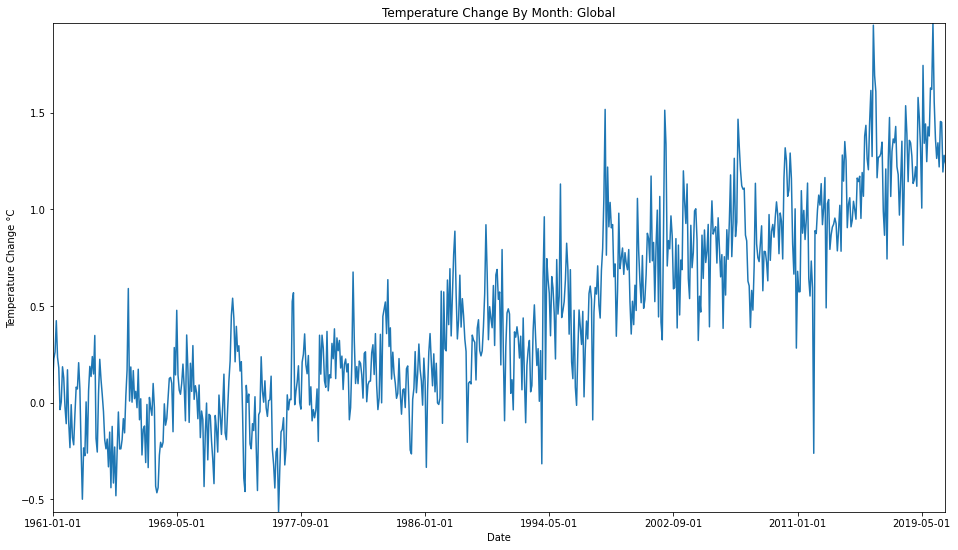

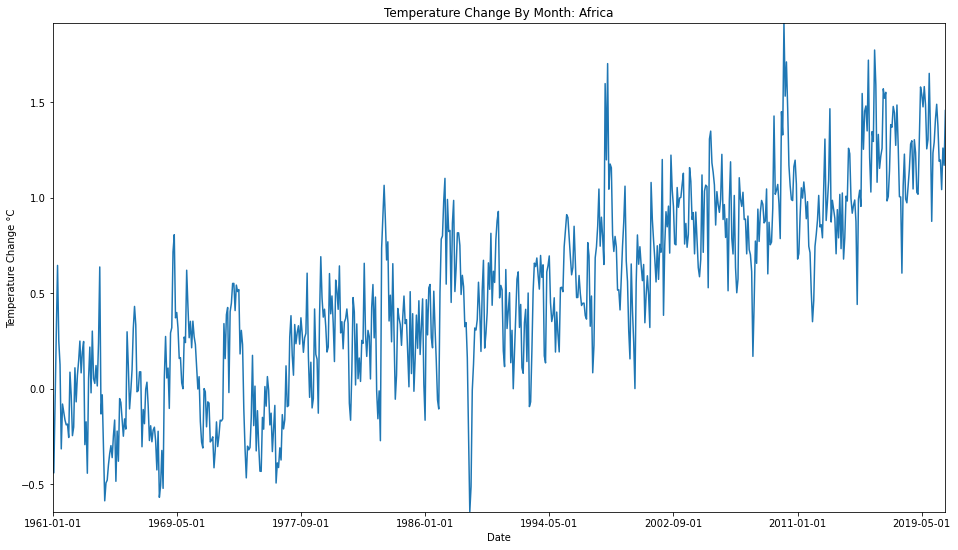

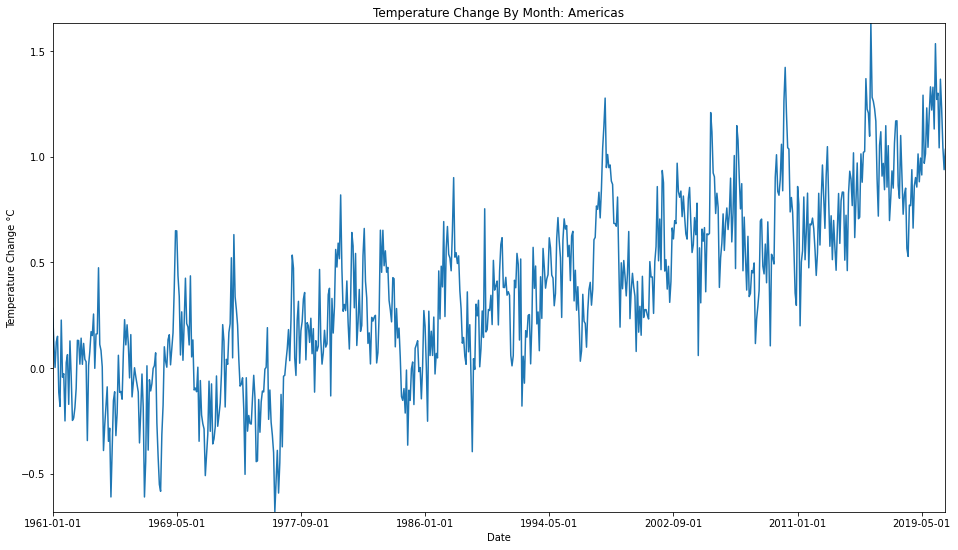

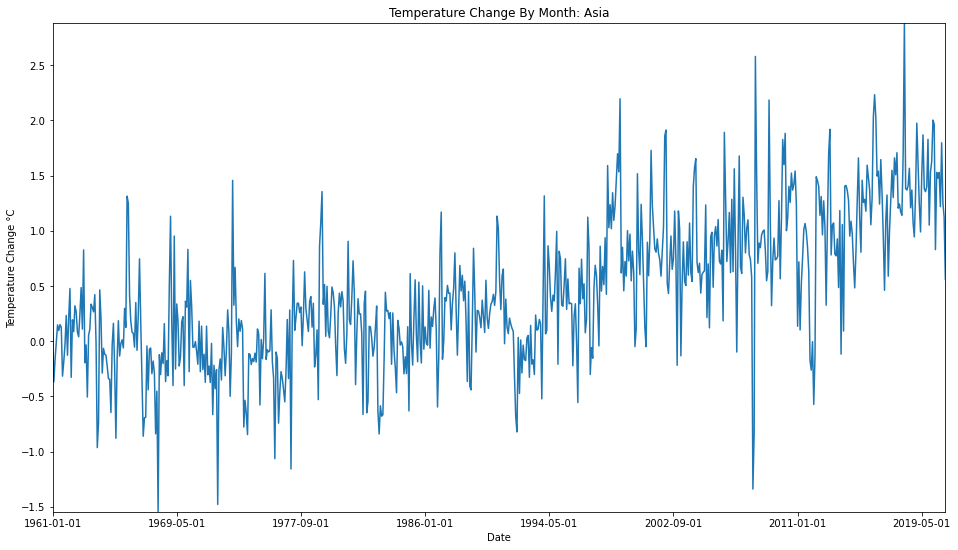

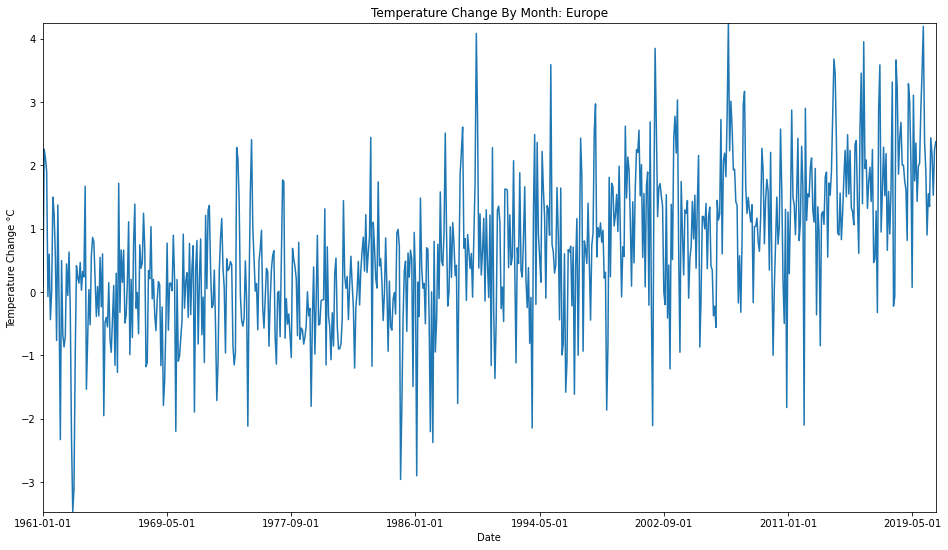

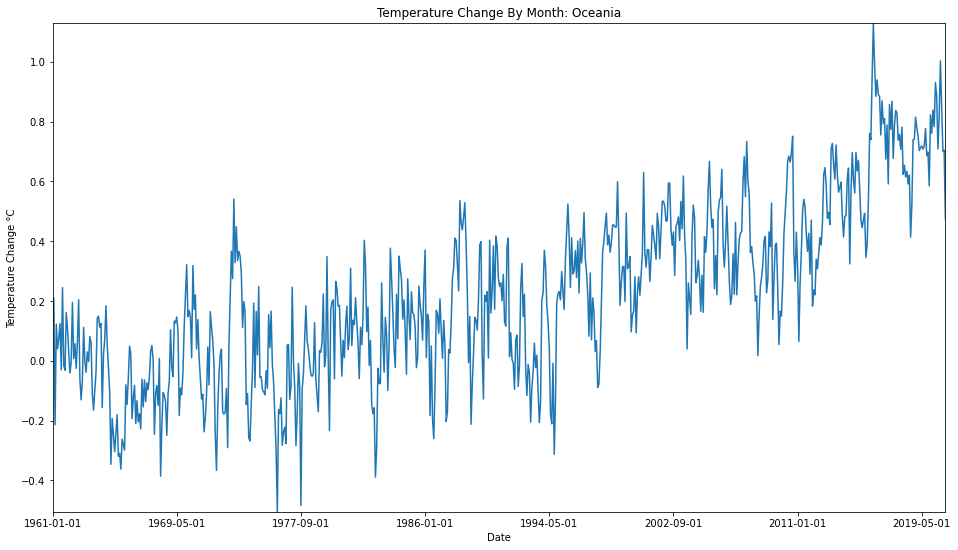

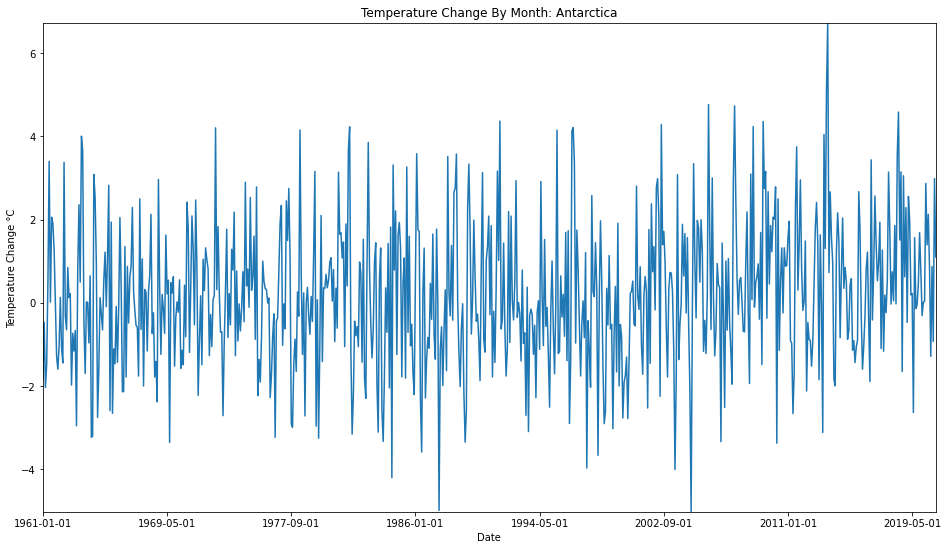

In [36]:
### Time series plot
for region in region_list:
    if region == 'Global':
        subp = data.groupby(['date'])['value'].mean()
    else:        
        data_region = data[data['region'] == region]
        subp = data_region.groupby(['date'])['value'].mean()
    
    fig, ax = plt.subplots(figsize=(16,9))  
    ax = subp.plot()
    maj_loc = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator
    ax.set(xlabel="Date", ylabel='Temperature Change °C',
       title='Temperature Change By Month: ' + region)
    plt.autoscale(tight=True)
    plt.show();


Observation: On this graphs of the 5 regions(Africa, Americas ,Asia, Europe, Oceania, and Antarctica) and a global overview we can see that the temperature change is increasing because there is a linear trend that is increasing , and we can see also seasonality due to the different seasons from winter to summer that affect the difference in the Temperature change.

For a better view we did a rolling Average of 12 months to smooth the graph which allows to have a clear view of the trend.

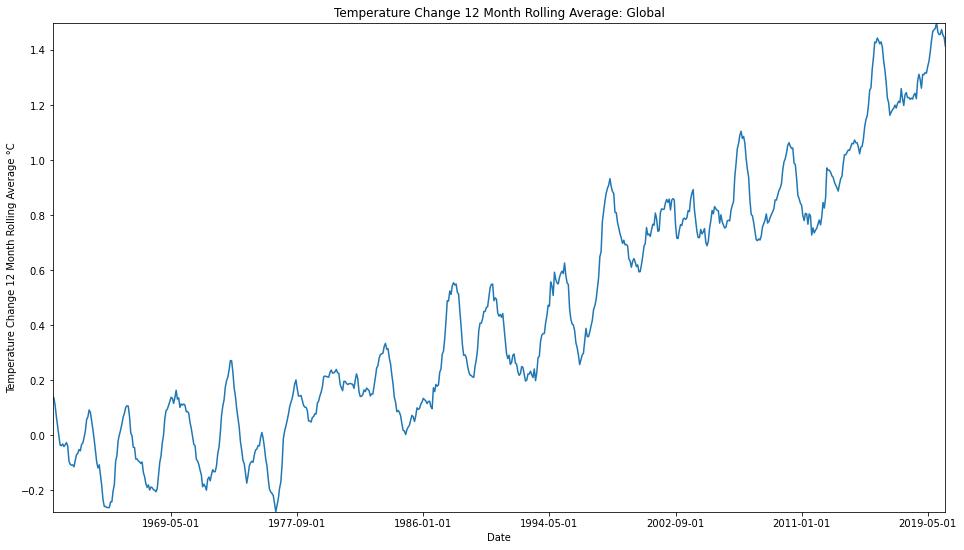

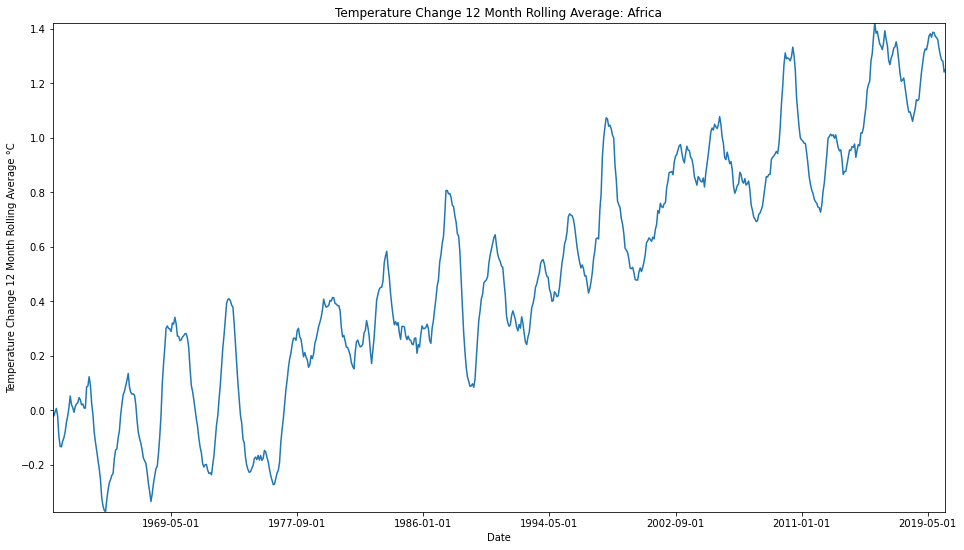

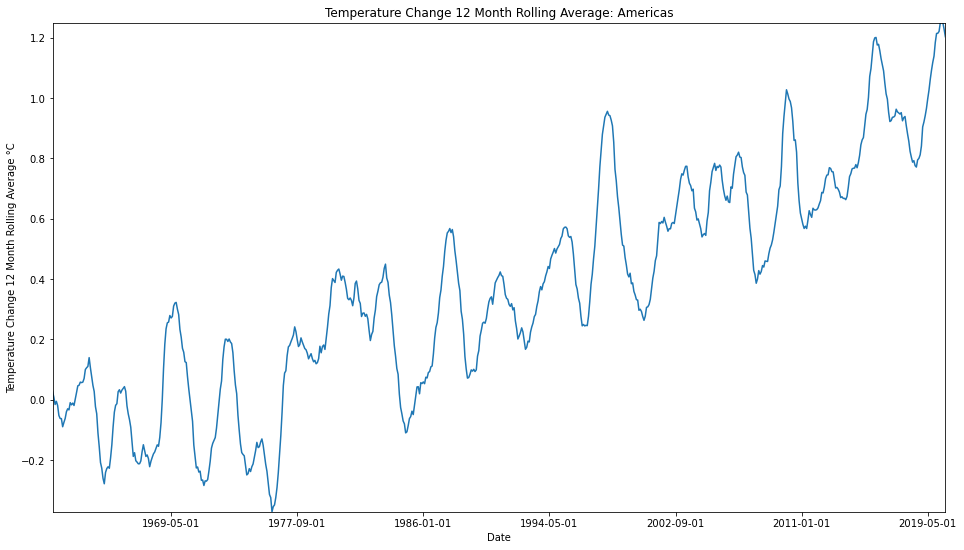

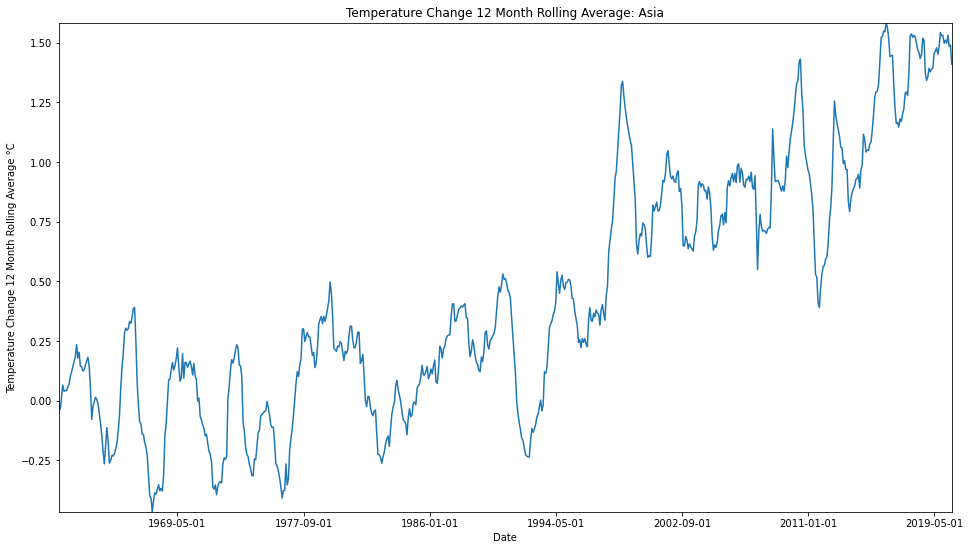

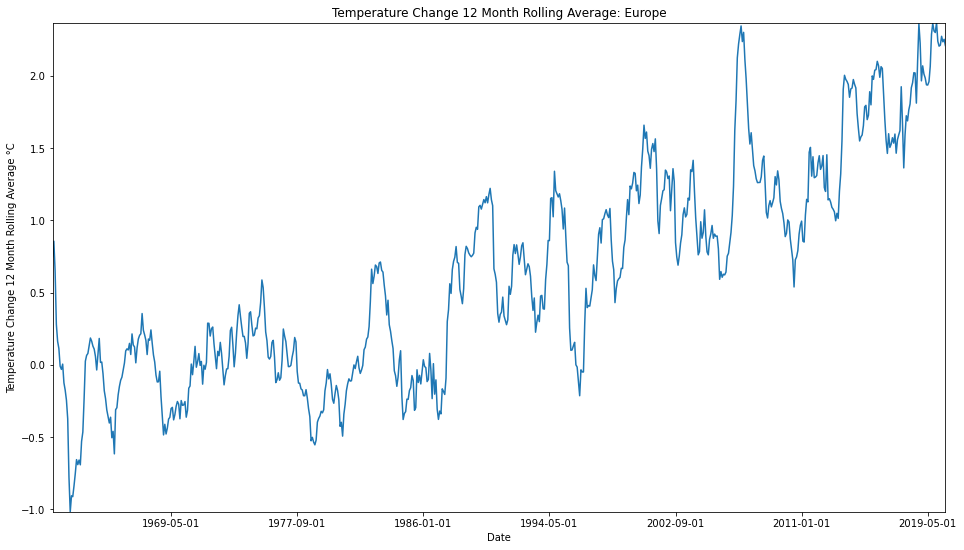

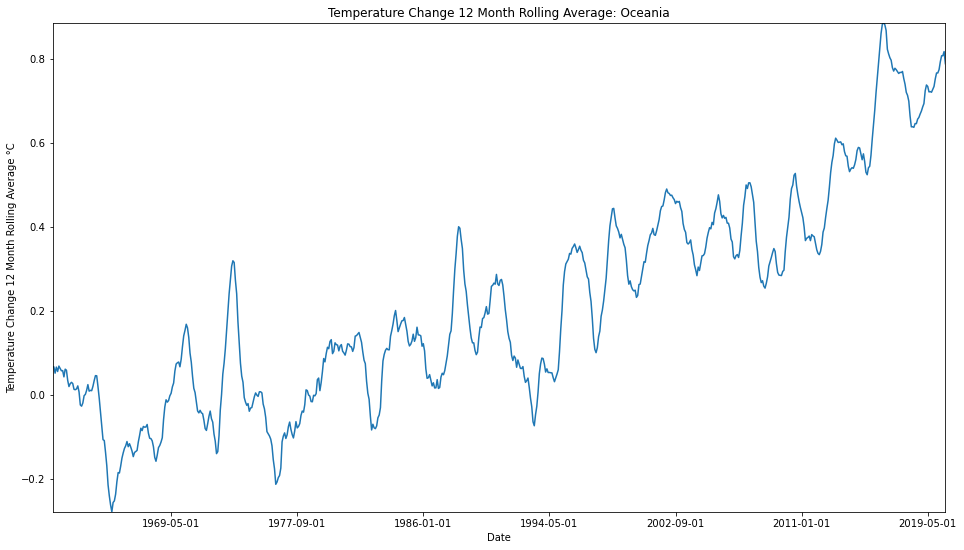

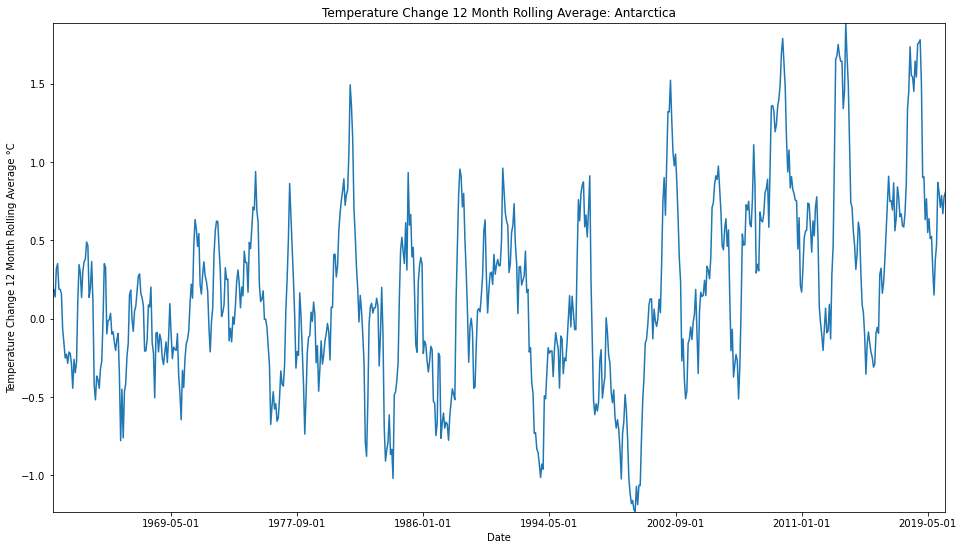

In [37]:
### Rolling Average plot 12 months

for region in region_list:
    if region == 'Global':
        subp = data.groupby(['date'])['value'].mean()
    else:        
        data_region = data[data['region'] == region]
        subp = data_region.groupby(['date'])['value'].mean()
    subp_rolling = subp.rolling(window=12, center=True).mean()
    fig, ax = plt.subplots(figsize=(16,9))  
    ax = subp_rolling.plot()
    maj_loc = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator
    ax.set(xlabel="Date", ylabel='Temperature Change 12 Month Rolling Average °C',
       title='Temperature Change 12 Month Rolling Average: ' + region)
    plt.autoscale(tight=True)
    plt.show();


### AutoCorrelations

In [38]:
data_asia_gr = data[data['region'] == 'Asia'].groupby(['date'])['value'].mean()

In [39]:
data_asia_gr_df = pd.DataFrame(data_asia_gr)

In [40]:
# trying different lag 
data_asia_gr_df['value'].autocorr(lag=3)

0.5931119355239066

In [41]:
data_asia_gr_df['value'].autocorr(lag=12)

0.4835797802863506

In [42]:
data_asia_gr_df['value'].autocorr(lag=60)

0.41238974547391005

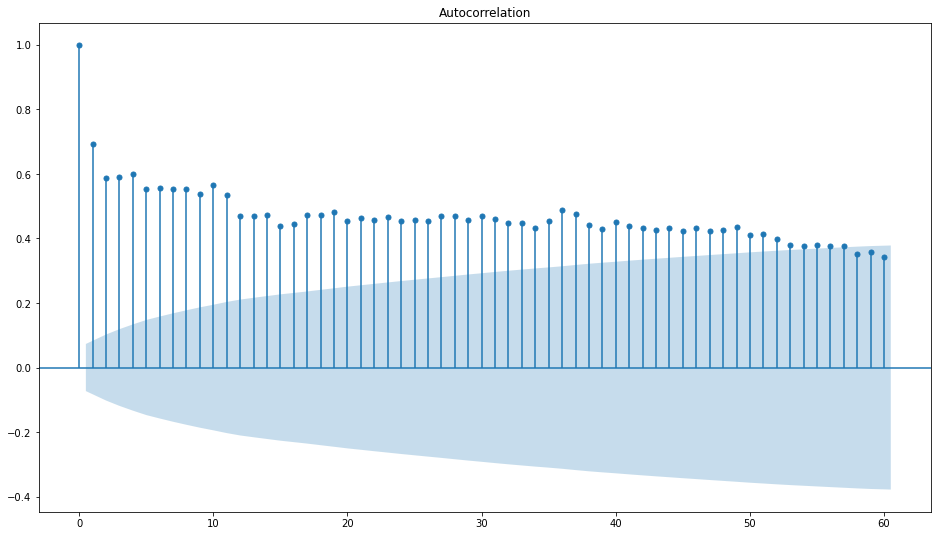

In [43]:
### sample plot for Asia Region
plt.rcParams["figure.figsize"] = [16,9]
plot_acf(data_asia_gr.values, lags=60)
plt.show()

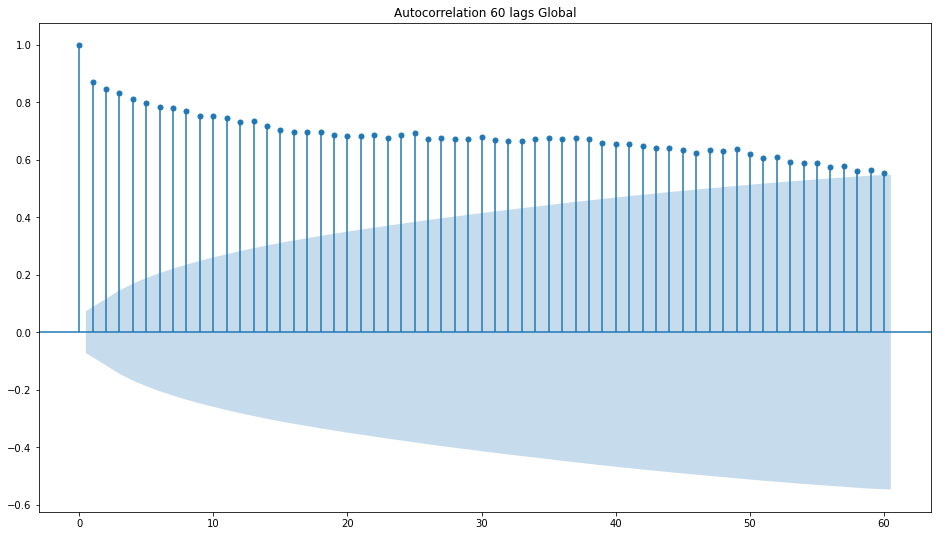

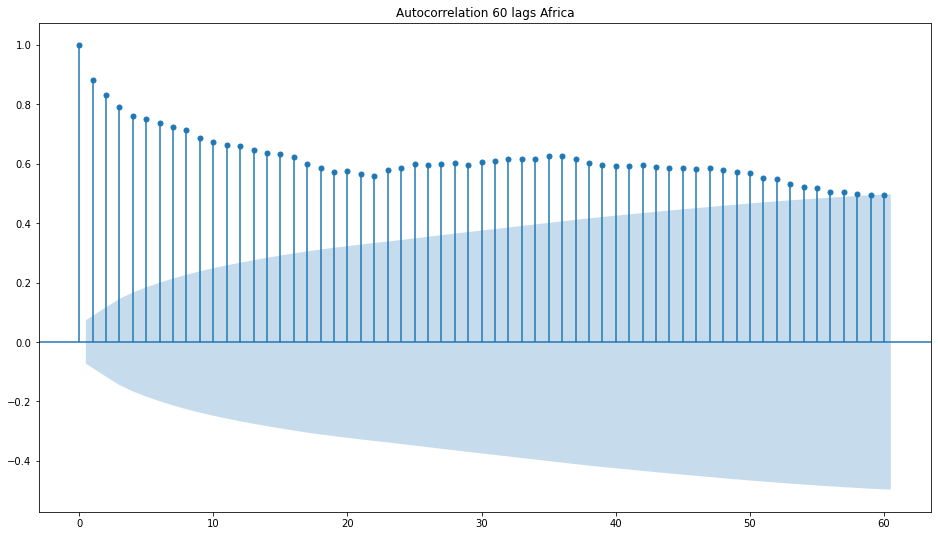

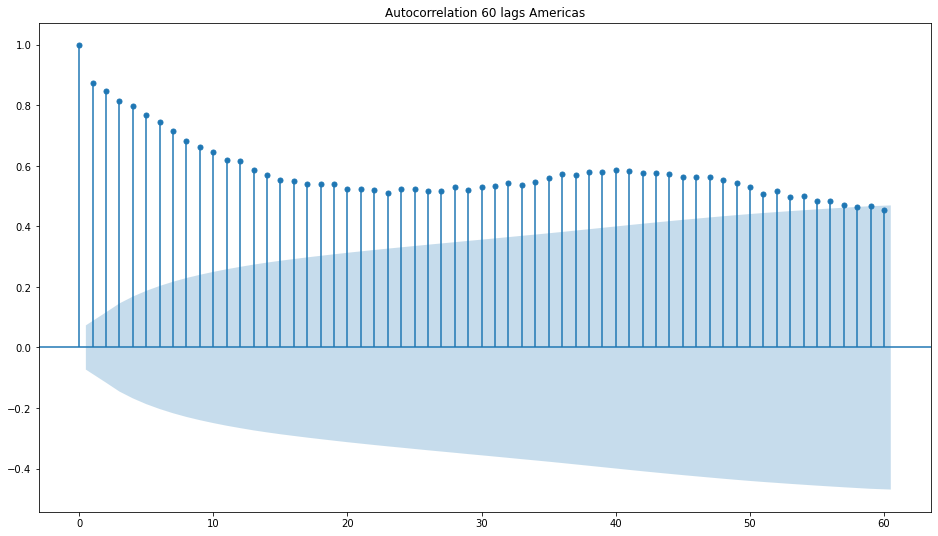

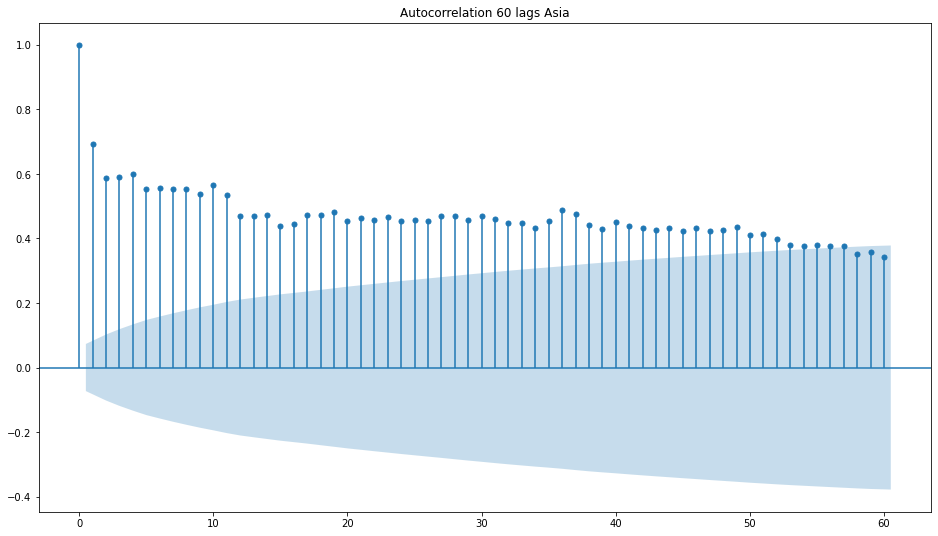

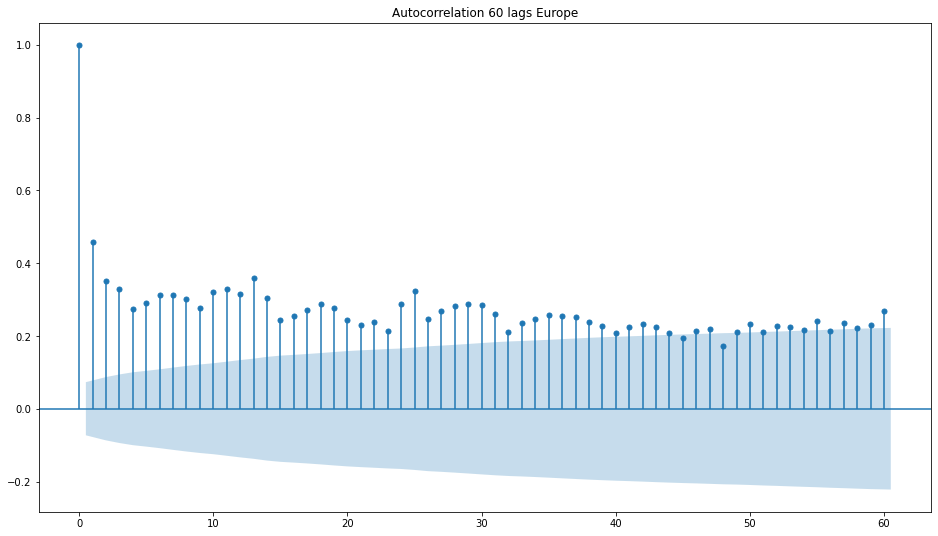

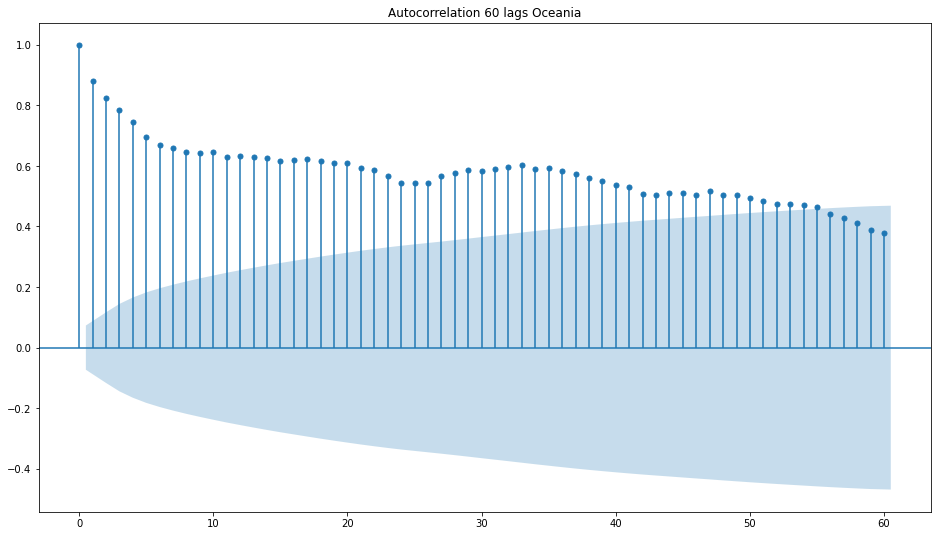

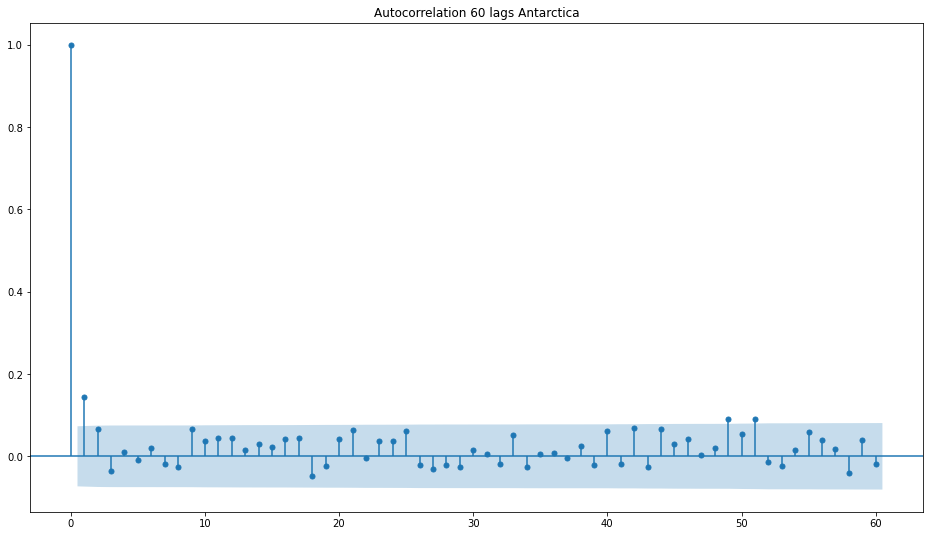

In [44]:
### Autocorrelations lag 60 all regions

for region in region_list:
    if region == 'Global':
        subp = data.groupby(['date'])['value'].mean()
    else:        
        data_region = data[data['region'] == region]
        subp = data_region.groupby(['date'])['value'].mean()
    plot_acf(subp, lags= 60 ,title= 'Autocorrelation 60 lags ' + region)

The plot of autocorrelation for the different regions shows that

• Africa: we can see that the temperature change is correlated from ACF up to 57 months with the blue filled space that represents the 95% of confidence interval which means up to 4 years. There are spikes in the PACF at lag 1,2,3,4,5,6,17,23,25,38,51 which we can infer that there is some correlation between consecutive 6 months that make seasons, and positive correlations that come around 2 years, 38 months. There are negative relationships that occur at 17 months and 51 months.

• Americas: we can see that the temperature change is correlated from ACF up to 56 months with the blue filled space that represents the 95% of confidence interval which means up to 4 years. There are spikes in the PACF at lag 1,2,3,4,12,16,24,28,35,51,52 which we can infer that there is some correlation between consecutive 3-4 months that make seasons, and positive correlations that come around at 12,16,24,28,35 and 52 months. There are negative relationships that occur 51 months.

• Asia: we can see that the temperature change is correlated from ACF up to 57 months with the blue filled space that represents the 95% of confidence interval which means up to 4 years. There are spikes in the PACF at lag 1,2,3,6,7,8,10,12,17,19,36 which we can infer that there is some correlation between consecutive 3-6 months for different seasons, and positive correlations that come around 17,19, and 36 months. There are negative relationships that occur at 12months.

• Oceania: we can see that the temperature change is correlated from ACF up to 57 months with the blue filled space that represents the 95% of confidence interval which means up to 4 years. There are spikes in the PACF at lag 1,2,3,6,7,9,10,12,16,24,25,27,33,42,44,48,56

• Europe: we can see that the temperature change is correlated from ACF up to 40 months with the blue filled space that represents the 95% of confidence interval which means up to 3 years. There are spikes in the pacf at lag 1,2,3,5,6,7,8,10,11,13,24,25

• Antarctica: we can see that the temperature change is correlated from ACF up to 40 months with the blue filled space that represents the 95% of confidence interval which means up to 3 years. There are spikes in the pacf at lag 1,9,18,49,51

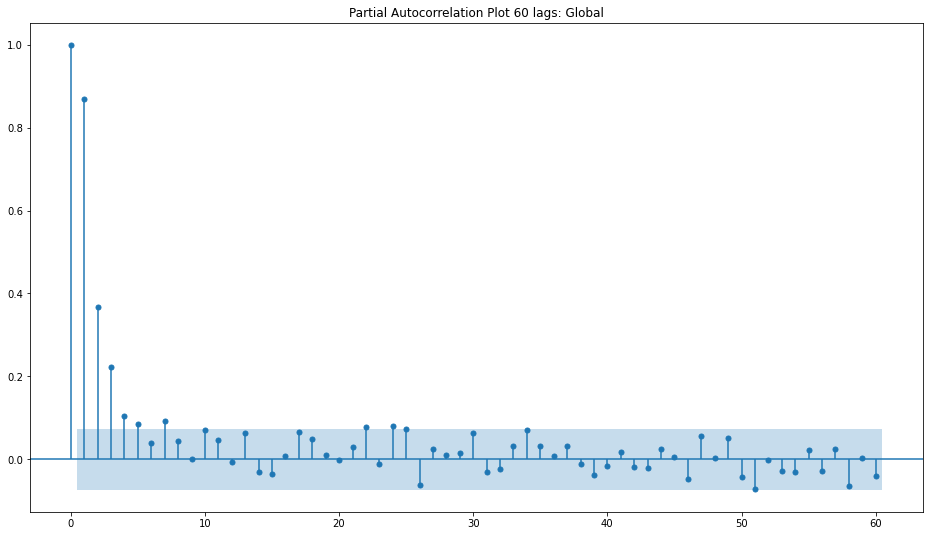

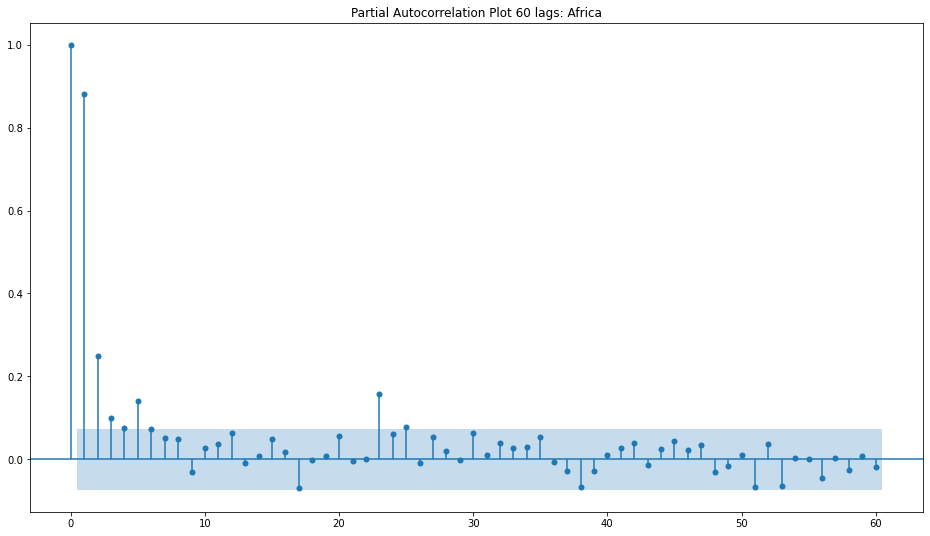

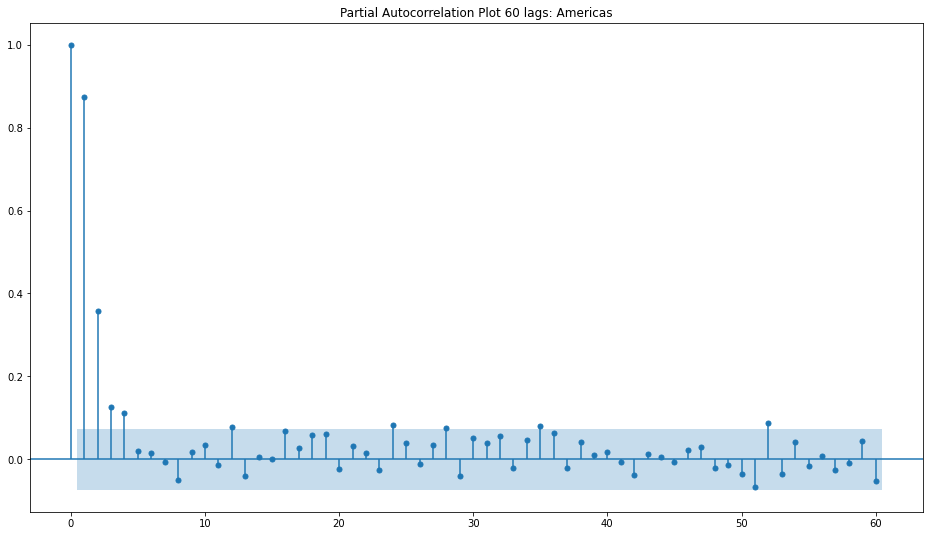

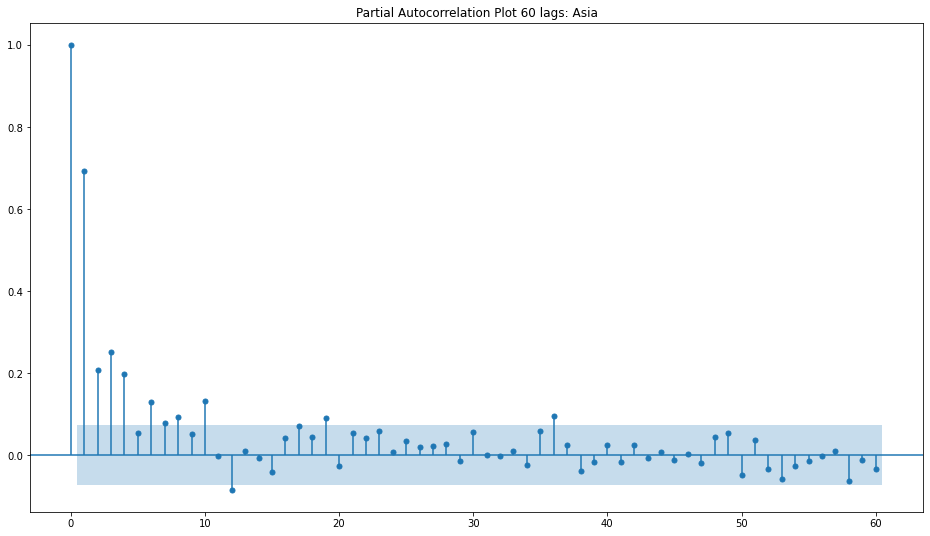

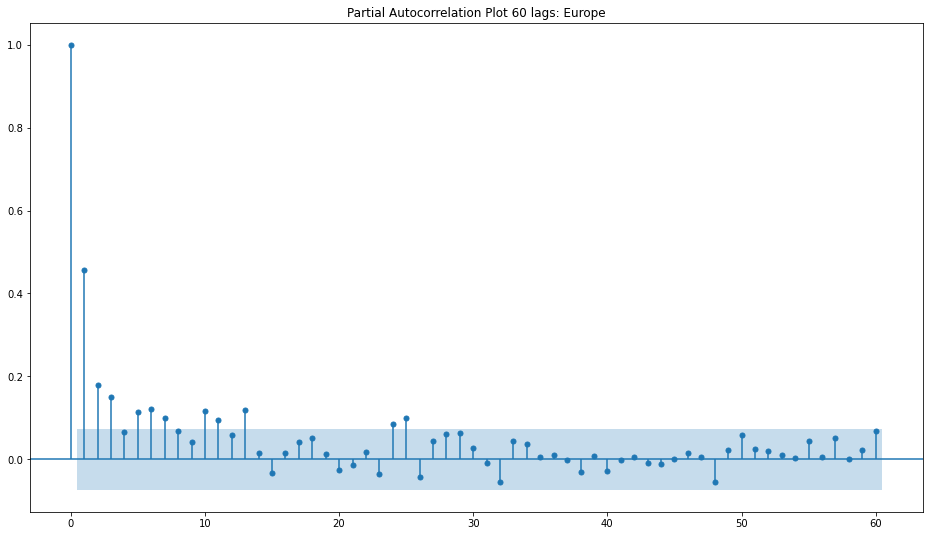

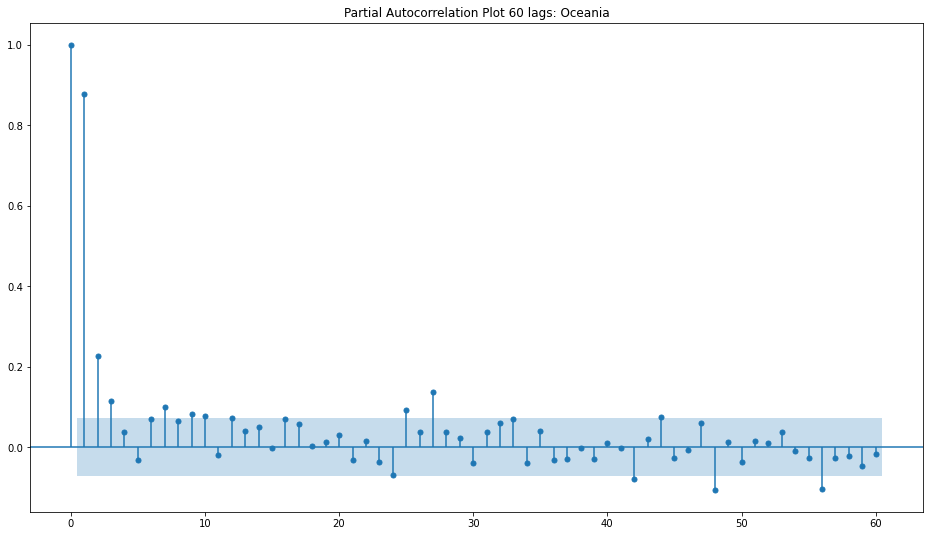

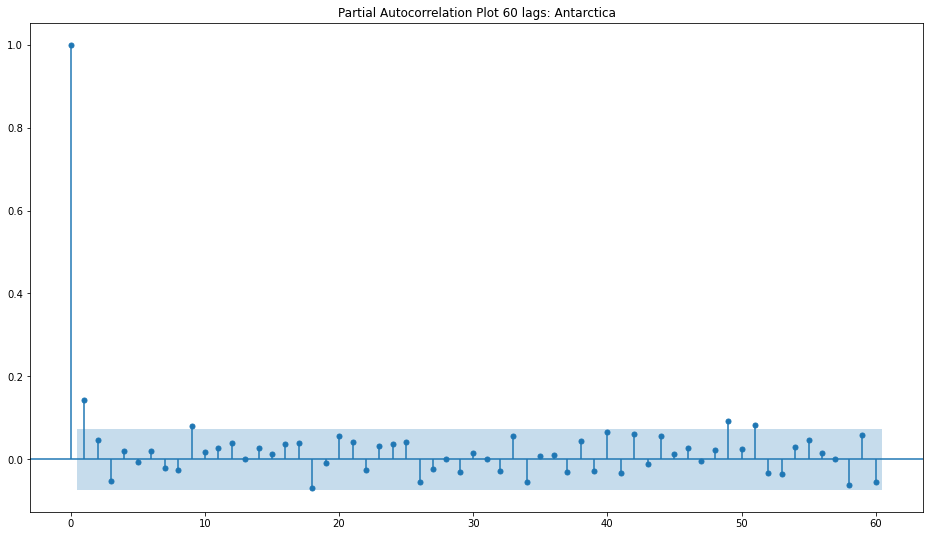

In [45]:
### Partial Autocorrelations lag 60 for all Regions
##plt.rcParams["figure.figsize"] = [16,9]

for region in region_list:
    if region == 'Global':
        subp = data.groupby(['date'])['value'].mean()
    else:        
        data_region = data[data['region'] == region]
        subp = data_region.groupby(['date'])['value'].mean()
    plot_pacf(subp.values, lags=60,title= 'Partial Autocorrelation Plot 60 lags: ' + region, method='ywm')

## Seasonality and trend 

In this part for better understanding of the data we did a sasonal decompose to visualize the trend and seasonality of the period of 60 months which is 5 years.

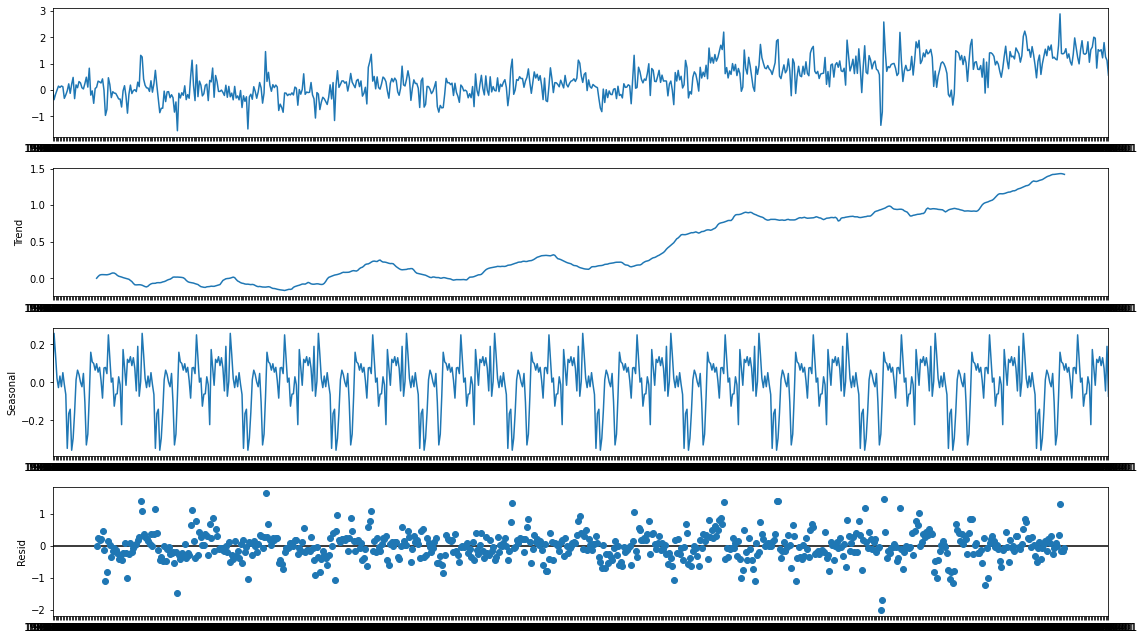

In [46]:
### sample decomposition for Asia Group
decomposition = seasonal_decompose(data_asia_gr_df , period = 60)
plt.rcParams["figure.figsize"] = [16,9]
decomposition.plot()
plt.show()

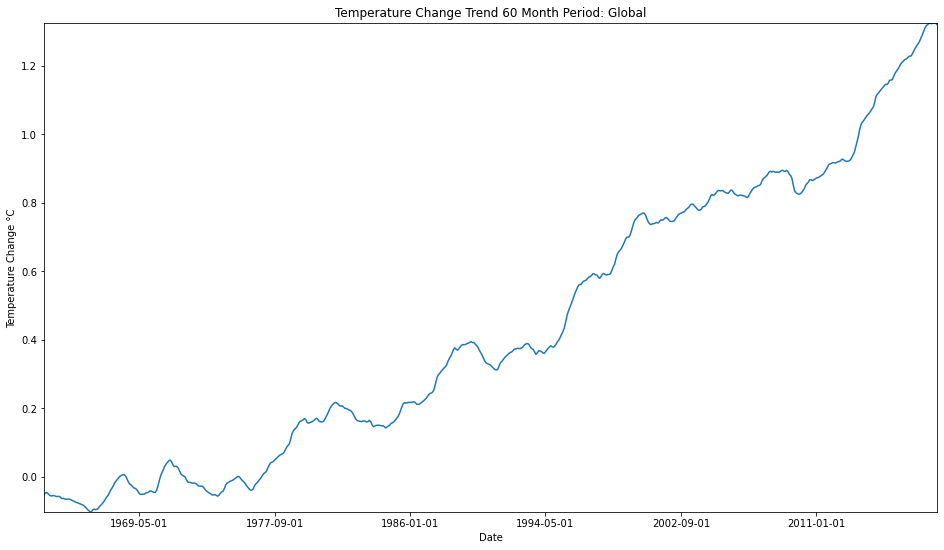

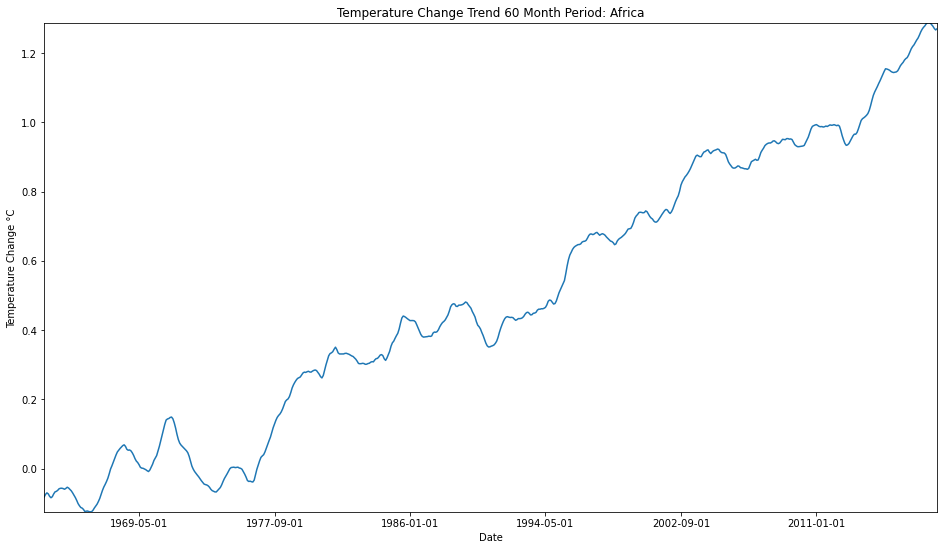

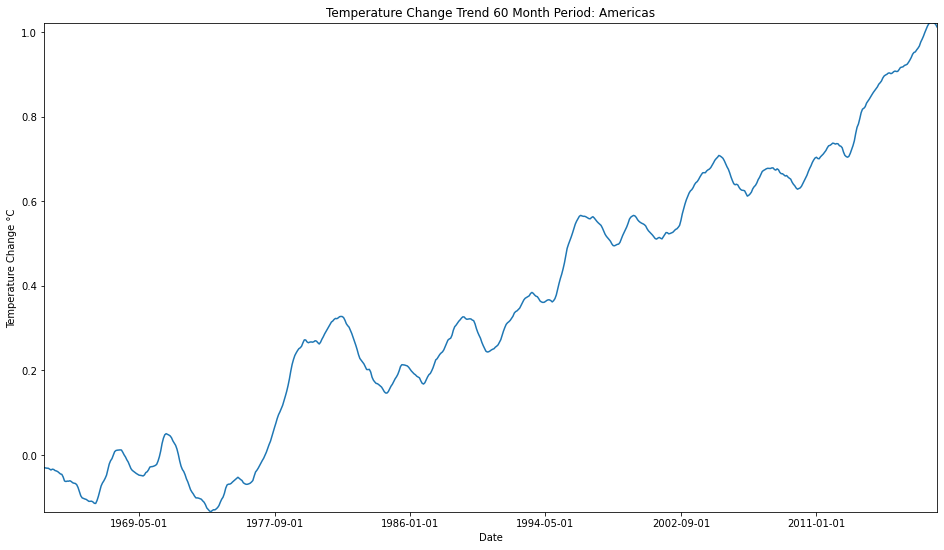

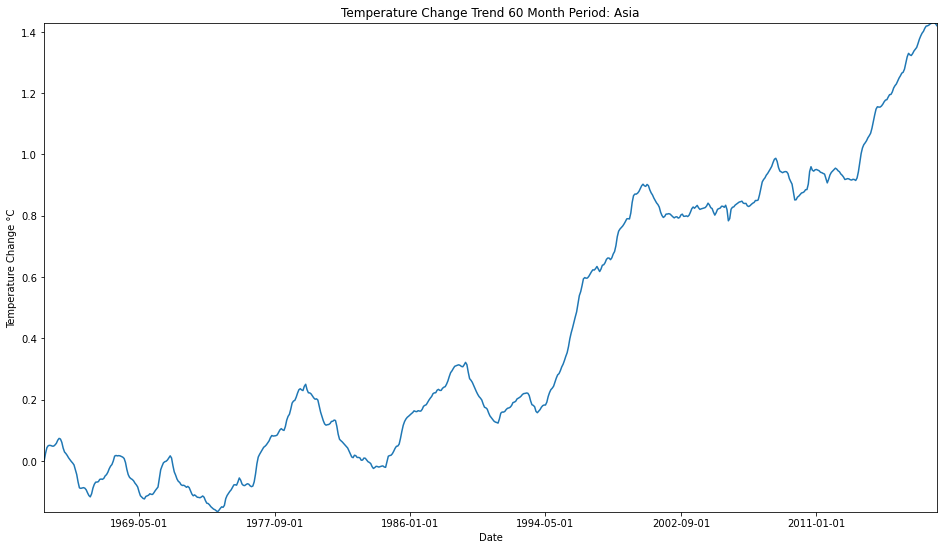

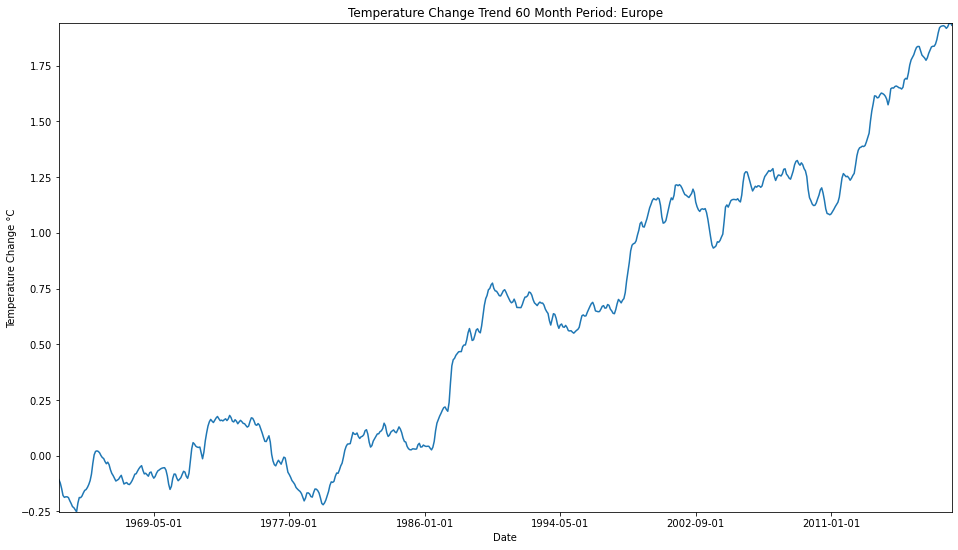

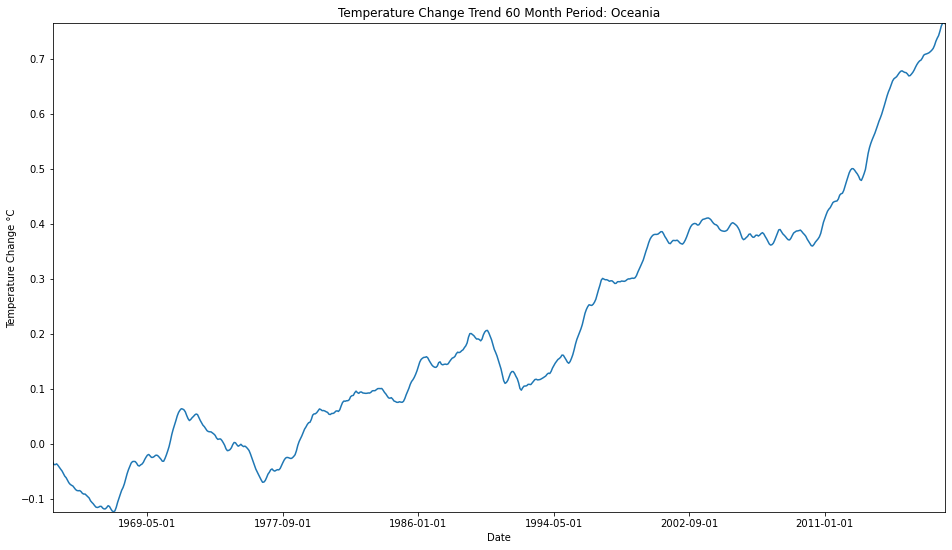

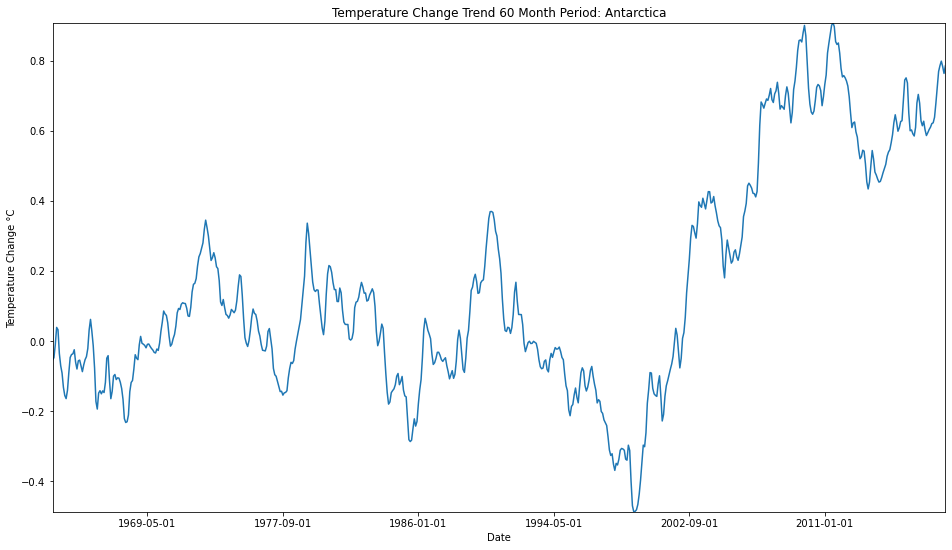

In [47]:
### Trend Decomposition in 5 years

for region in region_list:
    if region == 'Global':
        subp = data.groupby(['date'])['value'].mean()
    else:        
        data_region = data[data['region'] == region]
        subp = data_region.groupby(['date'])['value'].mean()
    decomposition = seasonal_decompose(subp , period = 60)  
    trend = decomposition.trend
    fig, ax = plt.subplots(figsize=(16,9))  
    ax = trend.plot()
    maj_loc = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator
    ax.set(xlabel="Date", ylabel='Temperature Change °C',
       title='Temperature Change Trend 60 Month Period: ' + region)
    plt.autoscale(tight=True)
    plt.show();    
        

Observation: With this trend decomposition we can now see that globally the temperature change is rising to 1.2°C.  If we look at each region we can see that Europe is having the highest temperature change because it is almost at 1.8°C. Another observation is that the highest Temperature in Antarctica occurred around 2009 to 2011 at 0.9°C in temperature change.

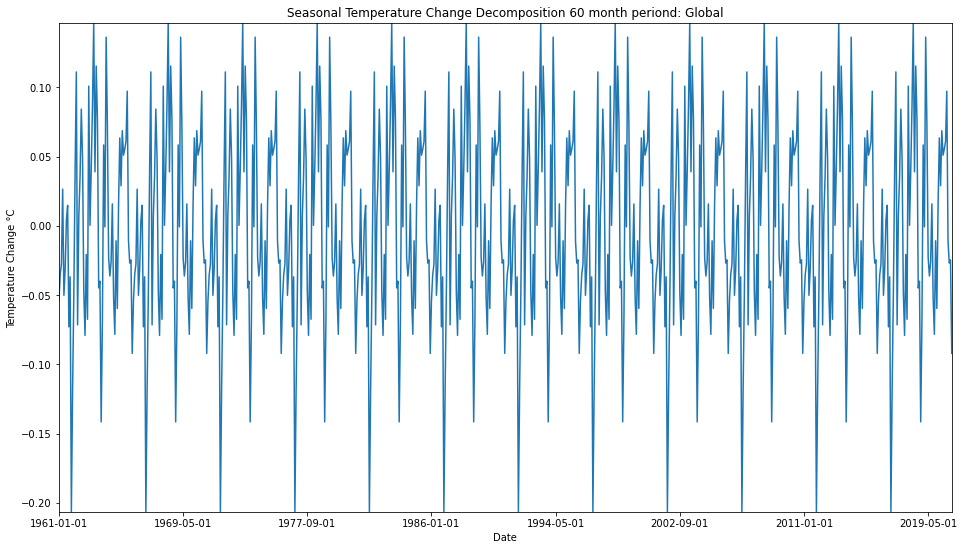

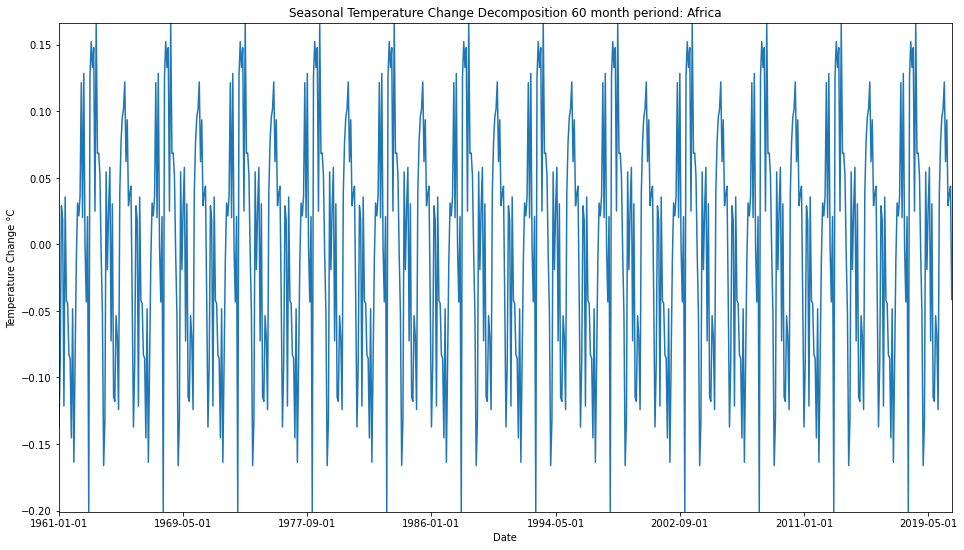

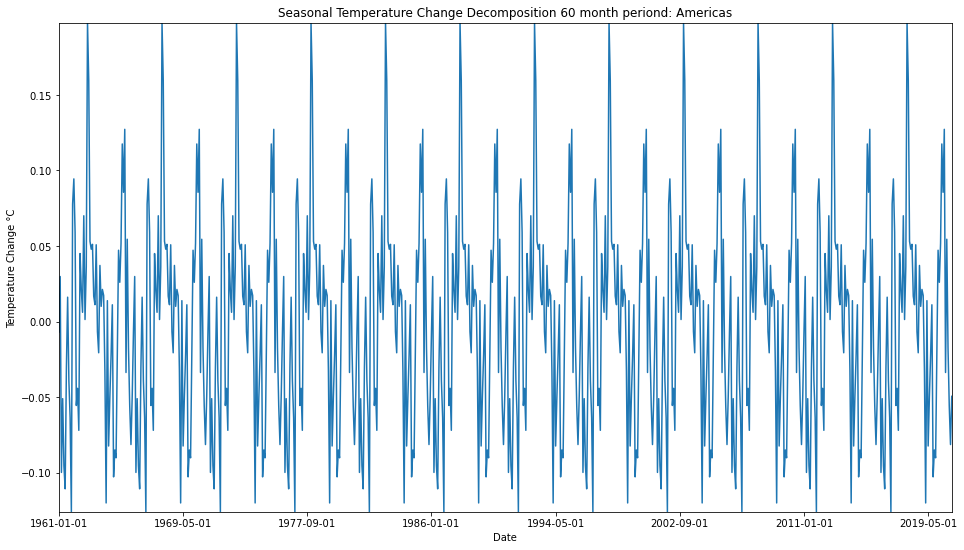

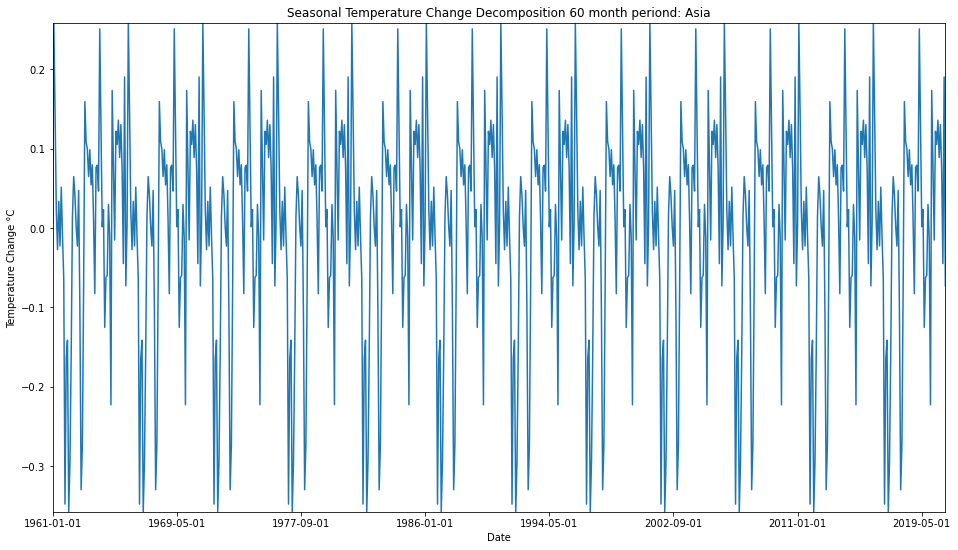

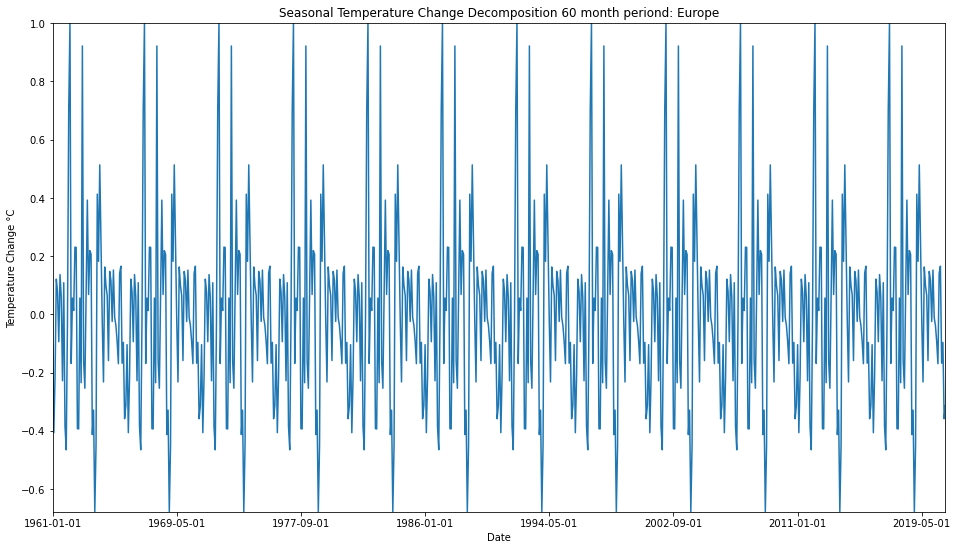

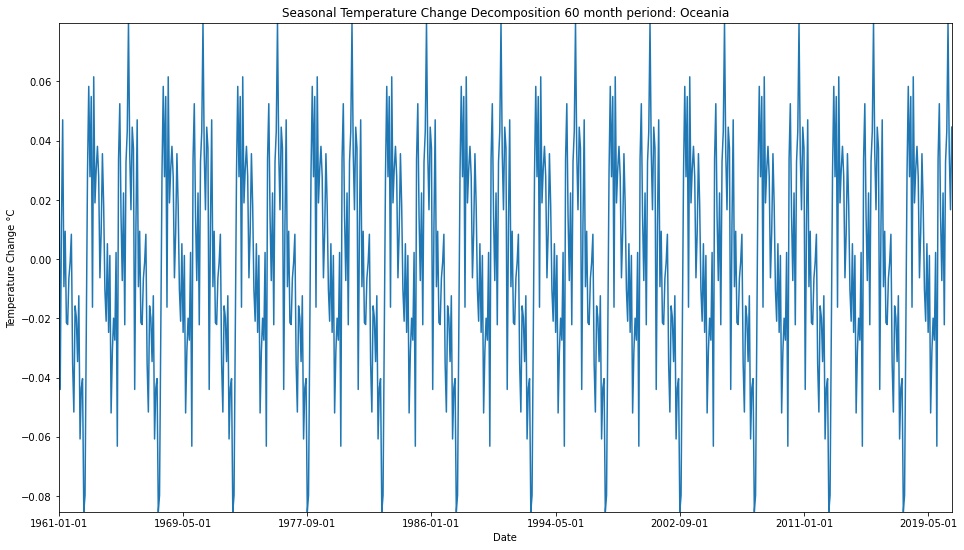

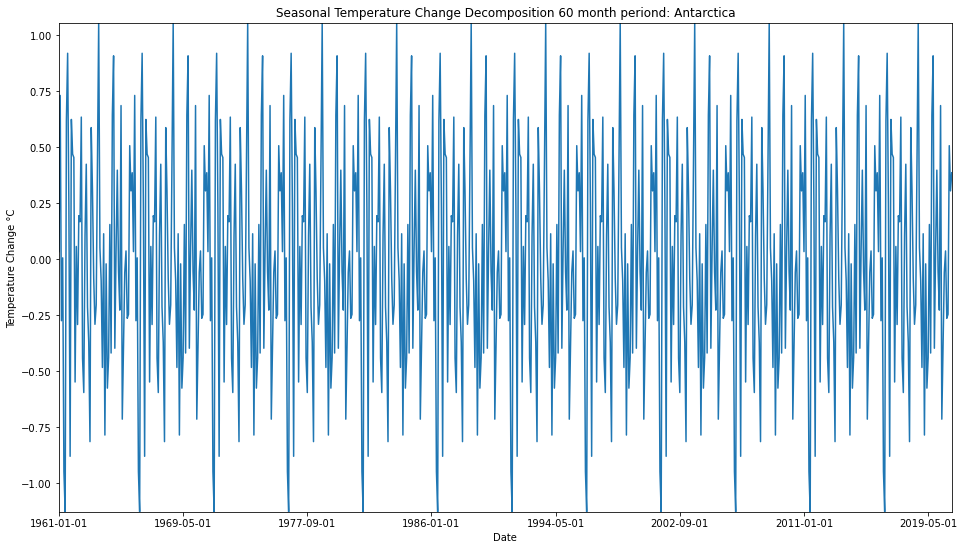

In [48]:
### Seasonality Decomposition for 5 year

for region in region_list:
    if region == 'Global':
        subp = data.groupby(['date'])['value'].mean()
    else:        
        data_region = data[data['region'] == region]
        subp = data_region.groupby(['date'])['value'].mean()
        
    decomposition = seasonal_decompose(subp , period = 60)
    seasonal = decomposition.seasonal
    
    fig, ax = plt.subplots(figsize=(16,9))  
    ax = seasonal.plot()
    maj_loc = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator
    ax.set(xlabel="Date", ylabel='Temperature Change °C',
       title='Seasonal Temperature Change Decomposition 60 month periond: ' + region)
    plt.autoscale(tight=True)
    plt.show();    

Observation: With this seasonal decomposition we can now see that the same temperature change reoccurs after some time almost around 2 years which gives it seasonality. It is slightly different from region to region.

## Modeling

In this part we built a SARIMAX model to predict and forecast the temperature change for the next 15 years. We choose to use SARIMAX because the model take into account the seasonality of our dataset.

SARIMA models include extra parameters related to the seasonal part.  Therefore, a SARIMA(p,d,q)(P,D,Q,S) model has (p,d,q) that are non-seasonal parameters and P,D,Q,S that are the seasonal parameters.

Non-seasonal orders

p: Autoregressive order. d: Differencing order. q: Moving average order.

Seasonal orders

P: Seasonal autoregressive order. D: Seasonal differencing order. Q: Seasonal moving average order S: Length of the seasonal cycle.

NOTE: To determine our initial parameters we needed a subset of region data so we have a strictly linear time series dataset where there is only one month per row.  We initially chose Asia.  The Global region was added after this initial step or we would have used that instead. 

In [49]:
data['date']= pd.to_datetime(data.date)

In [50]:
data_sample = pd.DataFrame(data[data['region'] == 'Asia'].groupby(['date'])['value'].mean())

In [51]:
data_sample.index = pd.DatetimeIndex(data_sample.index).to_period('M')

In [52]:
print(f'Number of observations: {data_sample.shape[0]}')
print(f'Number of training observations: {round(data_sample.shape[0] * 0.75)}')
print(f'Number of testing observations: {data_sample.shape[0] - (data_sample.shape[0] * 0.75)}')


Number of observations: 720
Number of training observations: 540
Number of testing observations: 180.0


In [53]:
train_sample = data_sample.iloc[:541,]
test_sample = data_sample.iloc[541:,]

In [54]:
# Import Augmented Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller
def my_dickey_fuller(data):
    data = data.dropna()
    print('\t\t\033[1mResults of Dickey-Fuller Test\033[0m\n\n')
    df_test = adfuller(data, maxlag=0, autolag=None)
    
    print(f'Test Statistic \t\t\t\t {round(df_test[0],2)}')
    print(f'p-value \t\t\t\t {df_test[1]}')
    print(f'Lags Used \t\t\t\t {round(df_test[2],2)}')
    print(f'Number of Observations \t\t\t {round(df_test[3],2)}')
    
    for key, value in df_test[4].items():
        print(f'Critical Value {key} \t\t\t {round(value, 2)}')

In [55]:
my_dickey_fuller(train_sample['value'])

		Results of Dickey-Fuller Test


Test Statistic 				 -12.09
p-value 				 2.1088410739169856e-22
Lags Used 				 0
Number of Observations 			 540
Critical Value 1% 			 -3.44
Critical Value 5% 			 -2.87
Critical Value 10% 			 -2.57


We did an Augmented Dickey-Fuller test to check if our time series are stationary using the a confidence interval of 95%.

We interpret this result using the p-value from the test. A p-value below a threshold of 5% suggests we reject the null hypothesis (stationary). Otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

According to the p-value we can say that our data are stationary.

Based on that result our initial d in the SARIMAX parameters will be 0.

In [56]:
# Import ARIMA model.
from statsmodels.tsa.arima_model import ARIMA
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):

        
            # Fitting an ARIMA(p, 0, q) model
            print(f'Attempting to fit ARIMA{p},0, {q} model')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog= data_sample,order = (p,0,q),freq = 'M')
            
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 0, q) model.
            print(f'The AIC for ARIMA ({p},0,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

    
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA ({best_p },0,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting to fit ARIMA0,0, 0 model
The AIC for ARIMA (0,0,0) is: 1441.3072465970647
Attempting to fit ARIMA0,0, 1 model
The AIC for ARIMA (0,0,1) is: 1160.4304258524287
Attempting to fit ARIMA0,0, 2 model
The AIC for ARIMA (0,0,2) is: 1078.8324364673617
Attempting to fit ARIMA0,0, 3 model
The AIC for ARIMA (0,0,3) is: 1050.2606189712417
Attempting to fit ARIMA0,0, 4 model
The AIC for ARIMA (0,0,4) is: 994.0380368876797
Attempting to fit ARIMA1,0, 0 model
The AIC for ARIMA (1,0,0) is: 975.3437462810452
Attempting to fit ARIMA1,0, 1 model
The AIC for ARIMA (1,0,1) is: 867.1030774367134
Attempting to fit ARIMA1,0, 2 model
The AIC for ARIMA (1,0,2) is: 837.2477206625606
Attempting to fit ARIMA1,0, 3 model
The AIC for ARIMA (1,0,3) is: 839.0580571052237
Attempting to fit ARIMA1,0, 4 model
The AIC for ARIMA (1,0,4) is: 841.0480314084209
Attempting to fit ARIMA2,0, 0 model
The AIC for ARIMA (2,0,0) is: 944.9794753416209
Attempting to fit ARIMA2,0, 1 model
The AIC for ARIMA (2,0,1) is: 838.31

We used AIC (Akaike information criterion) metric to find the best value of p and q for non-seasonal orders . The best_aic is (4,0,3)

In [57]:

import time
t0 = time.time()
final_mse = 10000000000000
final_S = 0
final_D = 0
final_P = 0
final_Q = 0
start = test_sample.index[0]
end = test_sample.index[-1]
test_values = test_sample['value']
for S in range(5,7):
    for D in range(4):
        for P in range(4):
            for Q in range(4):
                print(f'Checking ({P}, {D}, {Q}, {S}) at {round(time.time() - t0)} seconds.')
                sarima = SARIMAX(endog = train_sample['value'],
                                     order = (4, 0, 3),
                                     seasonal_order = (P, D, Q, S)).fit()

                sarima_pred = sarima.predict(start=start, end = end)

                if mean_squared_error(test_values, sarima_pred) <final_mse:
                    final_mse = mean_squared_error(test_values, sarima_pred)
                    final_S = S
                    final_D = D
                    final_P = P
                    final_Q = Q

                    print(f'We just fit a SARIMAX(4, 0, 3)x({P}, {D}, {Q}, {S}) model with {mean_squared_error(test_values, sarima_pred)} MSE.')

              

print(f'The final model is SARIMAX(4, 0, 3)x({final_P}, {final_D}, {final_Q}, {final_S}).')

Checking (0, 0, 0, 5) at 0 seconds.
We just fit a SARIMAX(4, 0, 3)x(0, 0, 0, 5) model with 1.3057494032452368 MSE.
Checking (0, 0, 1, 5) at 0 seconds.
Checking (0, 0, 2, 5) at 1 seconds.
Checking (0, 0, 3, 5) at 2 seconds.
We just fit a SARIMAX(4, 0, 3)x(0, 0, 3, 5) model with 1.3036294537807196 MSE.
Checking (1, 0, 0, 5) at 3 seconds.
Checking (1, 0, 1, 5) at 4 seconds.
Checking (1, 0, 2, 5) at 5 seconds.
Checking (1, 0, 3, 5) at 6 seconds.
We just fit a SARIMAX(4, 0, 3)x(1, 0, 3, 5) model with 1.2136862901161367 MSE.
Checking (2, 0, 0, 5) at 8 seconds.
Checking (2, 0, 1, 5) at 9 seconds.
Checking (2, 0, 2, 5) at 11 seconds.
Checking (2, 0, 3, 5) at 12 seconds.
Checking (3, 0, 0, 5) at 16 seconds.
Checking (3, 0, 1, 5) at 18 seconds.
We just fit a SARIMAX(4, 0, 3)x(3, 0, 1, 5) model with 1.2088561291184026 MSE.
Checking (3, 0, 2, 5) at 20 seconds.
Checking (3, 0, 3, 5) at 23 seconds.
Checking (0, 1, 0, 5) at 29 seconds.
We just fit a SARIMAX(4, 0, 3)x(0, 1, 0, 5) model with 0.61728558

The final model is SARIMAX(4, 0, 3)x(0, 2, 2, 6).

We used a for loop function to go through different value of P,D,Q which are seasonal orders to be used by the SARIMAX model in order to find the best seasonal parameters. S, the length of the seasonal cycle, will be determined by the partial autocorrelation by region.  The best seasonal orders is (2,2,2,6).

We later found in model testing that 6 for S did not give the best results so we made that as a parameter for our modeling. We determined the S by analyzing autocorrelation plots and testing for the best value.

In [58]:
def sarimax_model(region, S):
    ### define dataframe of region to model
    '''
    runs a Sarimax seasonal model for temperature change for all major regions using a train test split of 75% train
    returns a plot of predictions and the root mean squared error for the test set,
            a forecast plot for the next 15 years,
            and a residuals plot
    parameters are the region to be modelled and the Sarimax seasonal order to be used 
    '''
    if region == 'Global':
        data_region = pd.DataFrame(data.groupby(['date'])['value'].mean())
    else:        
        data_region = pd.DataFrame(data[data['region'] == region].groupby(['date'])['value'].mean())
    
    ### train test split  
    data_region.index = pd.DatetimeIndex(data_region.index).to_period('M')
  
    train = data_region.iloc[:541,]
    test = data_region.iloc[541:,]
    
    ## fit model
    sarima_model = SARIMAX(endog = train['value'] ,order = (4, 0, 3), seasonal_order = (2, 2, 2, S)).fit()
    
    ## get mean squared error
    start = test.index[0]
    end = test.index[-1]
    sarima_pred = sarima_model.predict(start=start, end = end)
    test_values = test['value']
    mse = mean_squared_error(test_values, sarima_pred, squared = False)
    
    
    ### plot actual vs predicted
    preds = pd.DataFrame(sarima_pred.values, index=sarima_pred.index)
    test.rename(columns = {'value':'actual'}, inplace = True)
    preds.rename(columns = {0:'predicted'}, inplace = True)
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title('Actual vs Predicted Temperature Change: ' + region + ' (RMSE: ' + str(mse) + ')')
    plt.ylabel('Temperature Change °C')
    test.plot(ax=ax)
    preds.plot(ax=ax);

    ### plot forecast model
    sarima_forecast = SARIMAX(endog = data_region['value'],order = (4, 0, 3),seasonal_order = (2, 2, 2, S)).fit()
    forecast = pd.DataFrame(sarima_forecast.predict(start = '1/1/2021',end = '1/1/2036'))
    ###forecast.rename(columns = {0:'forecasted'}, inplace = True)
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title('Forecasted Temperature Change: ' + region)
    plt.ylabel('Temperature Change °C')
    test.plot(ax=ax)
    forecast.plot(ax=ax);
    
    ### Plot Residuals
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title ('Plot of Model Residuals :' + region)
    sns.residplot(x=test ,y=preds, ax = ax)

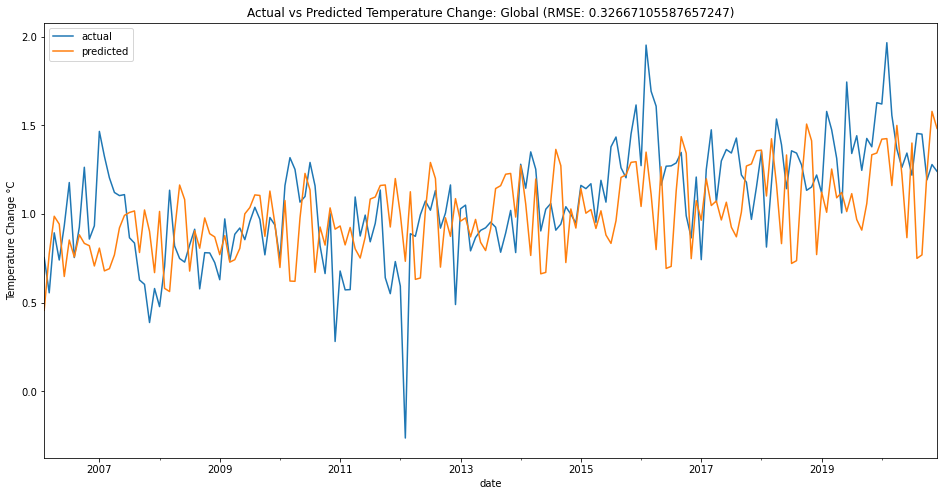

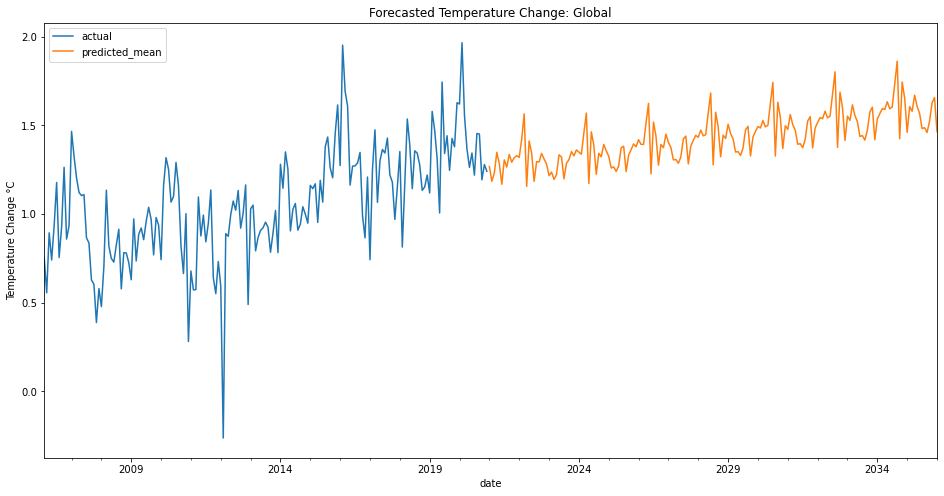

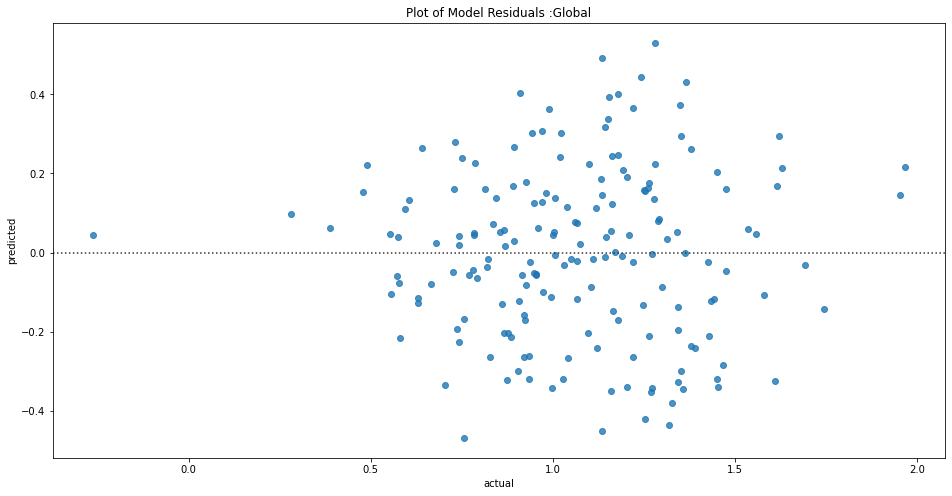

In [59]:
sarimax_model('Global',25)

The model on the Global data and using S as 25 is doing the prediction with RMSE = 0.32 for the global data. For the forecasting , it is picking up the increasing trend and seasonality of the data.

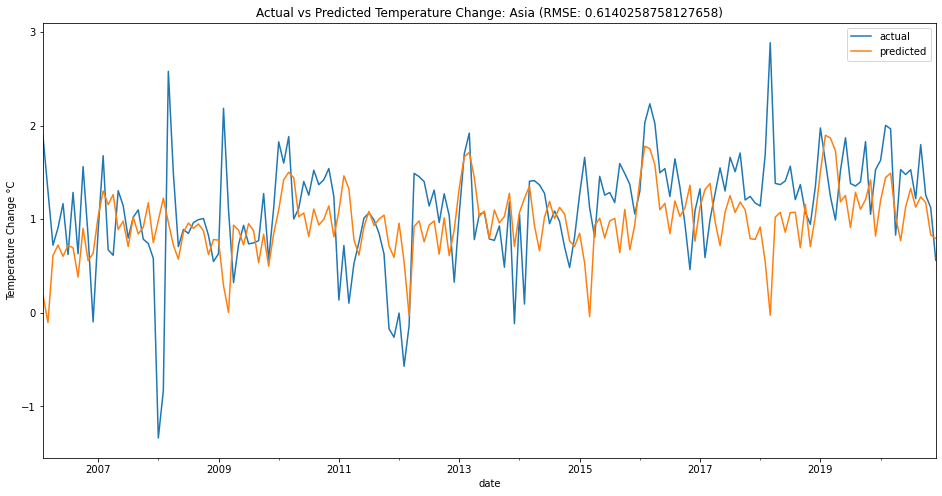

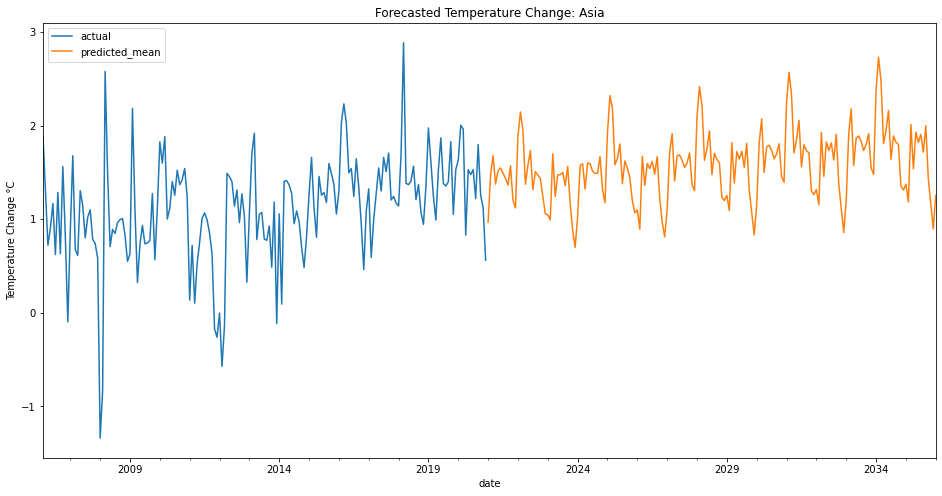

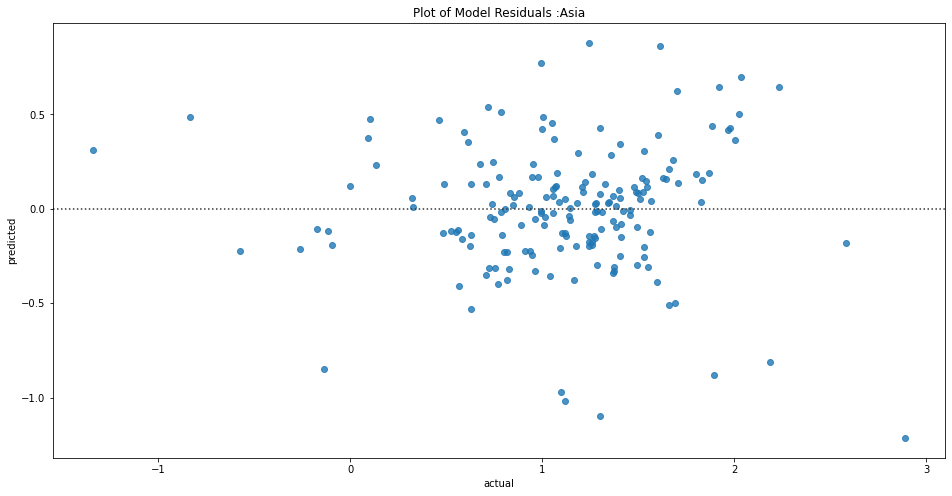

In [60]:
sarimax_model('Asia',36)

The model on the Asia region and using S = 25 is doing the prediction with  RMSE = 0.61  for the Asia region.
For the forecasting , it is picking up the increasing trend and seasonality of the data.

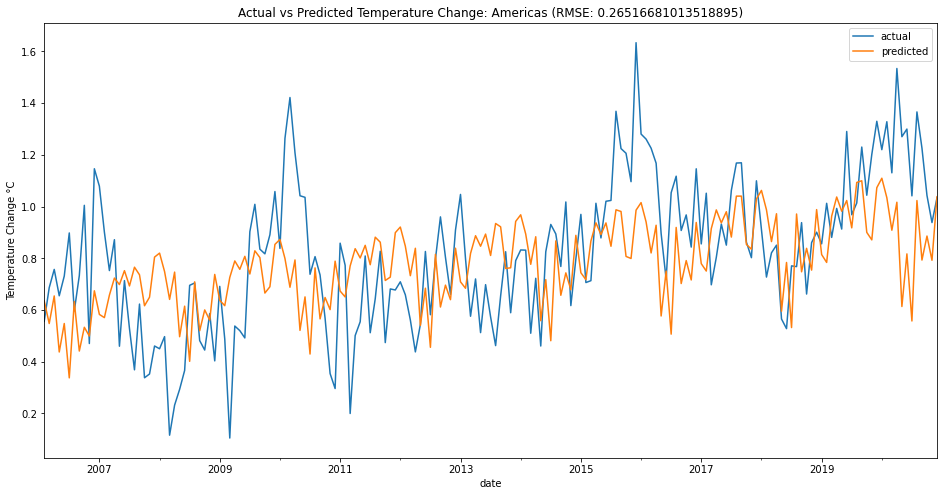

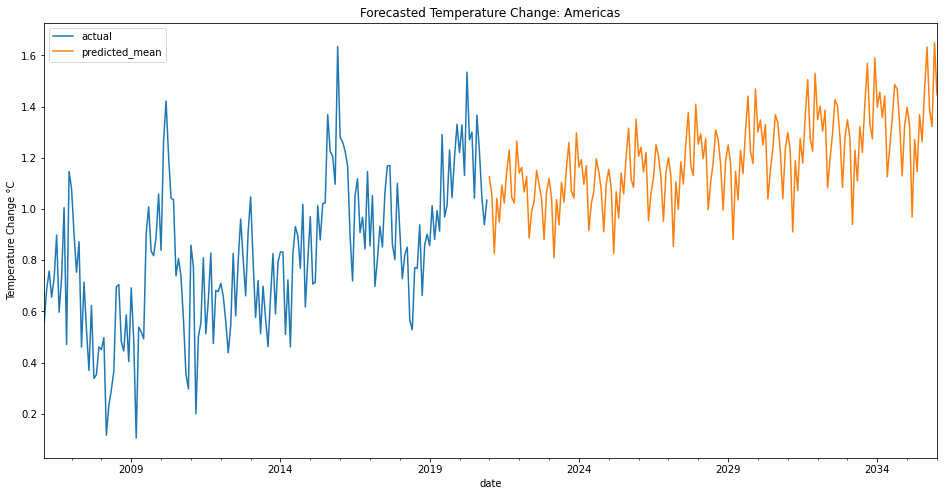

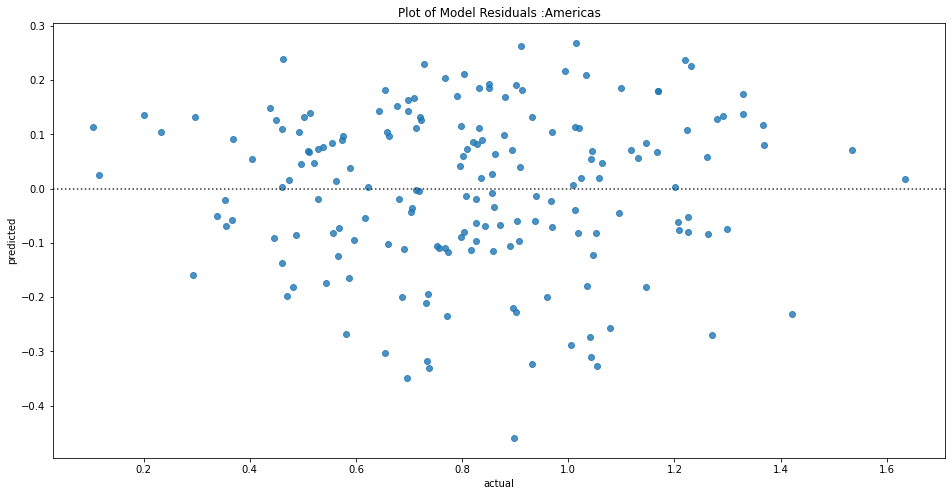

In [61]:
sarimax_model('Americas',24)

The model on the America region and using S = 25 is doing the prediction with RMSE = 0.26 for the America region. For the forecasting , it is picking up the increasing trend and seasonality of the data.

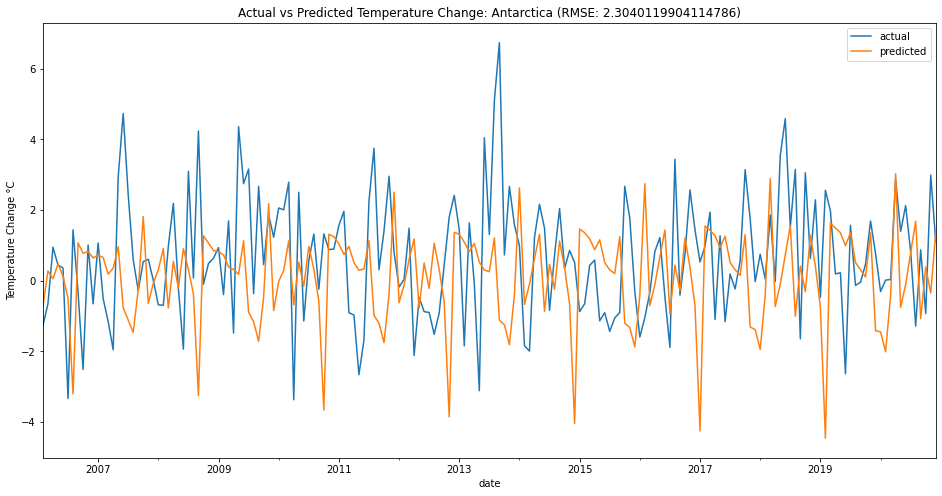

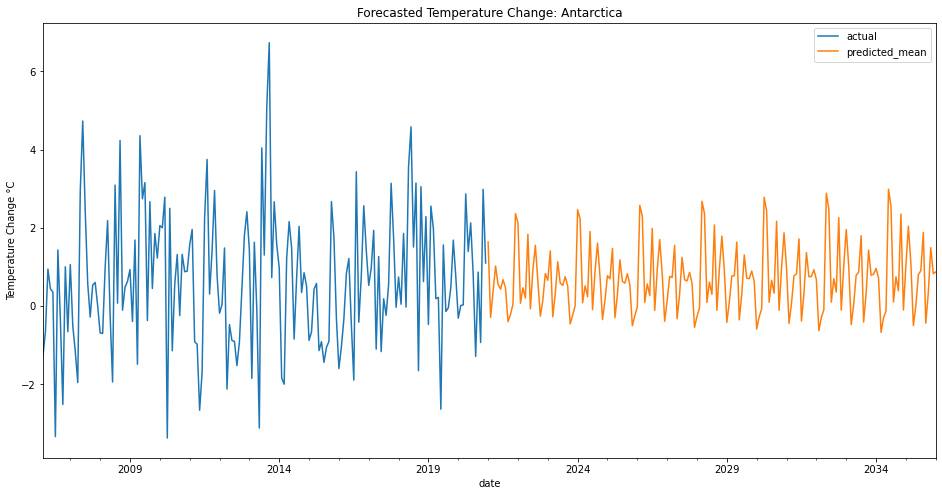

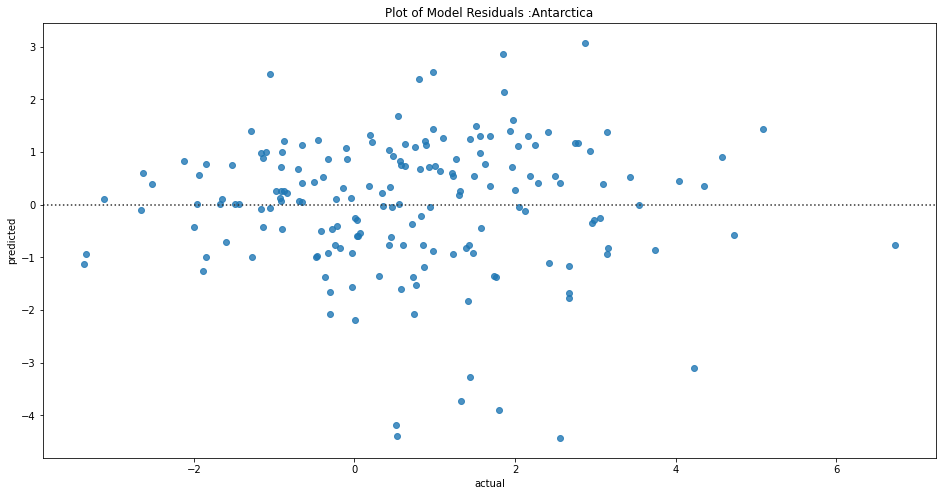

In [62]:
sarimax_model('Antarctica',25)

The model on the Antarctica region and using S = 25 is doing the prediction with RMSE = 2.30 for the Antarctica region. For the forecasting , it is picking up the increasing trend and seasonality of the data.

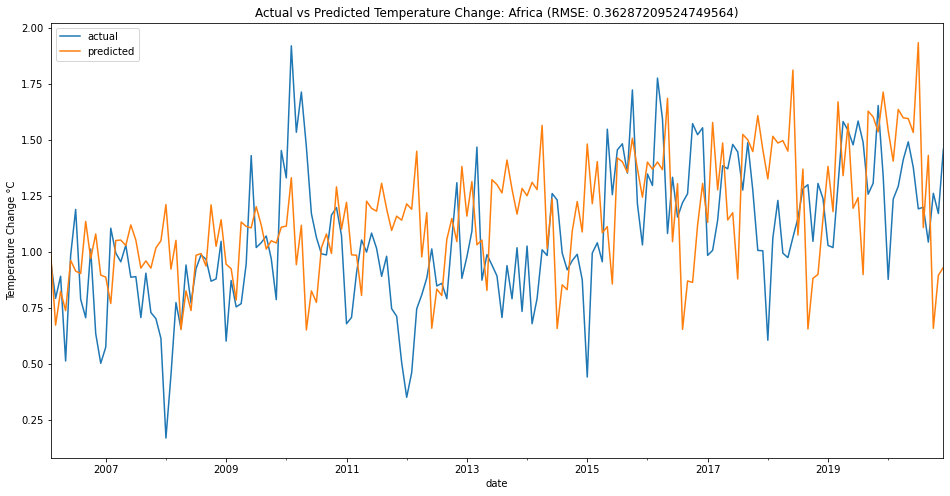

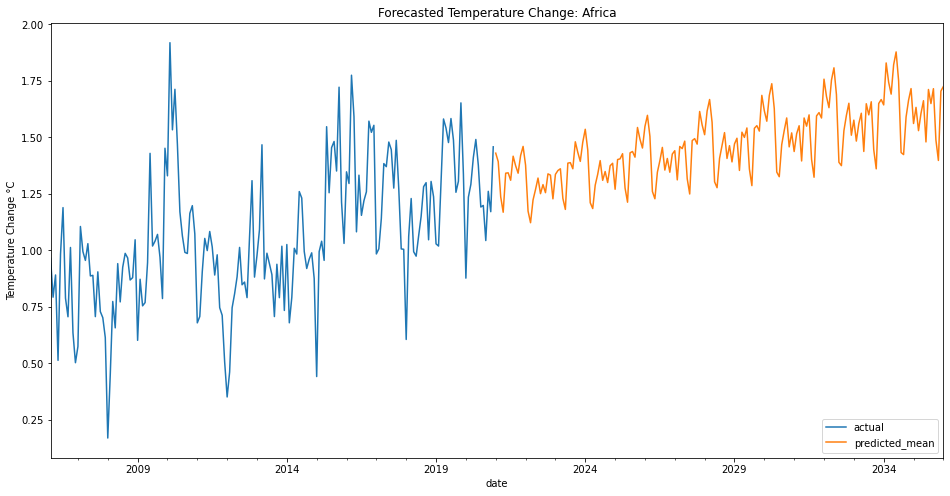

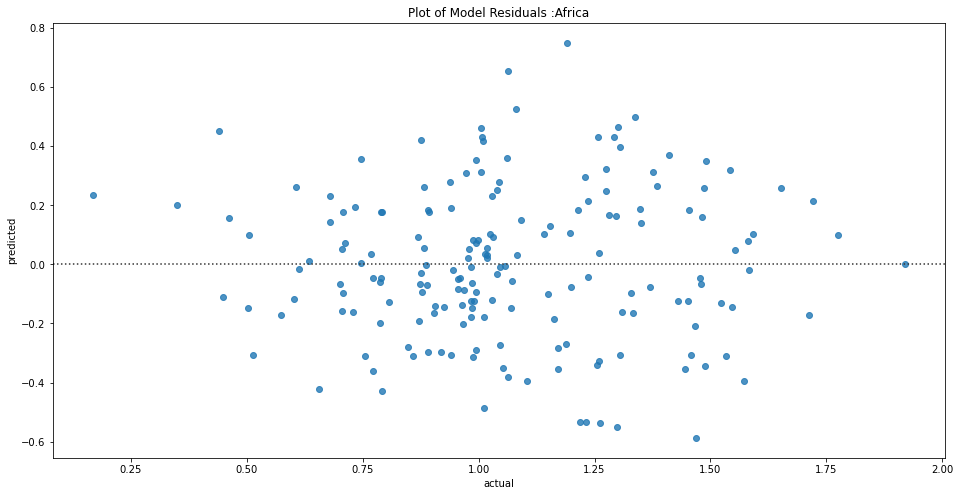

In [63]:
sarimax_model('Africa',25);

The model on the Africa region and using S = 25 is doing the prediction with RMSE = 0.36 for the Africa region. For the forecasting , it is picking up the increasing trend and seasonality of the data.

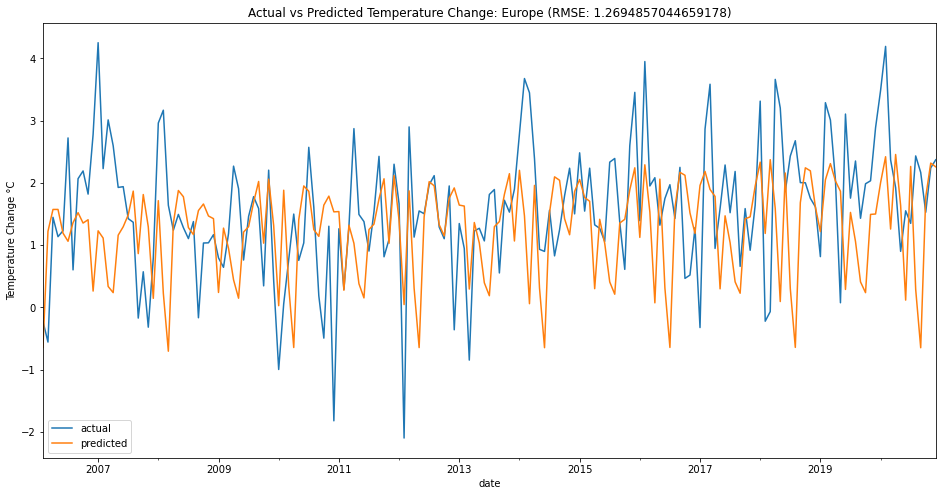

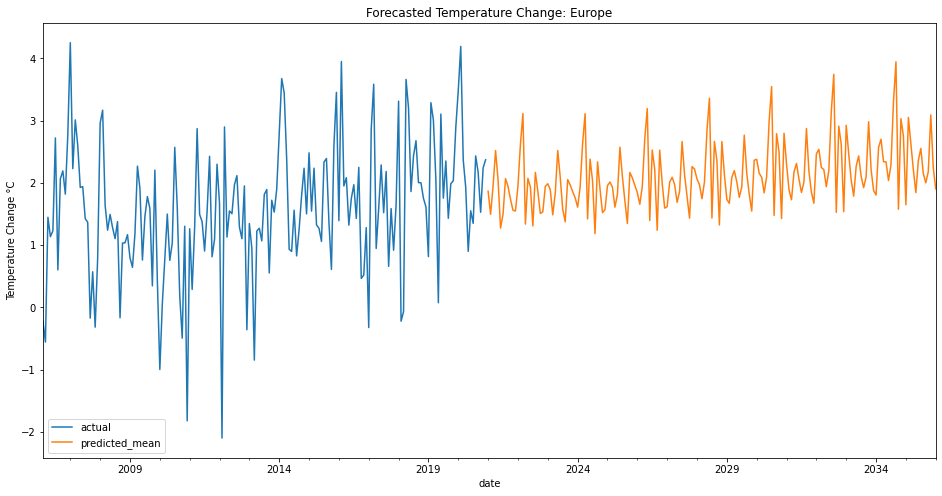

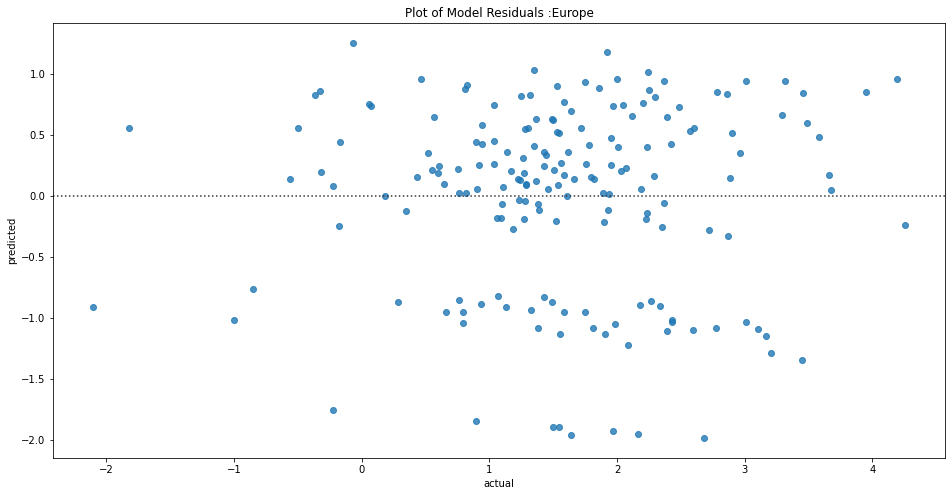

In [64]:
sarimax_model('Europe',25)

The model on the Europe region and using S = 25 is doing the prediction with RMSE = 1.26 for the Europe region. For the forecasting , it is picking up the increasing trend and seasonality of the data.

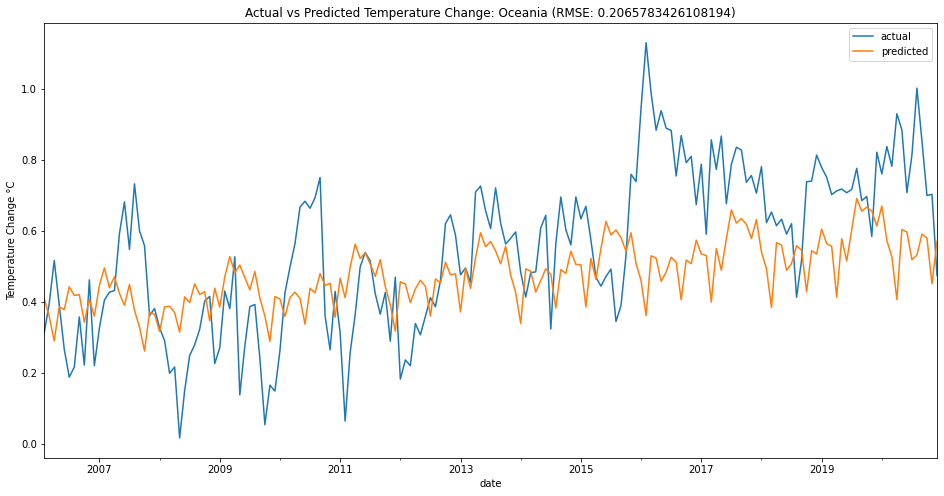

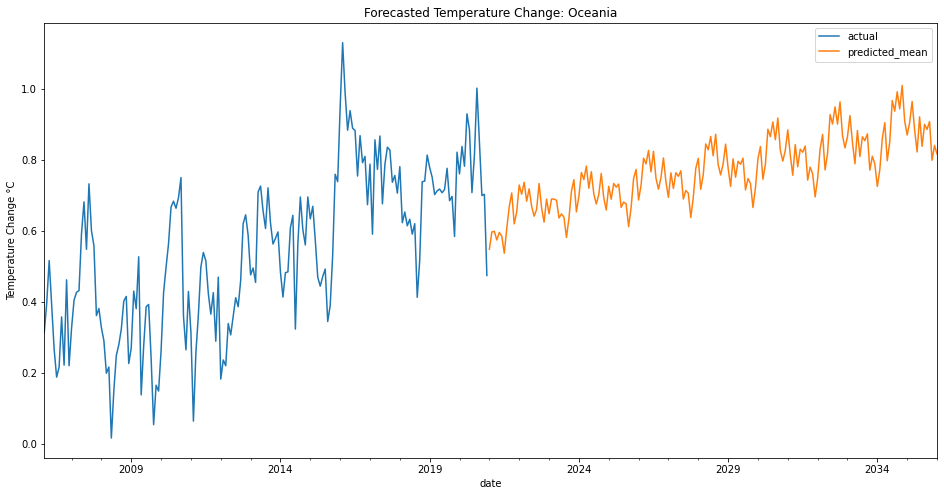

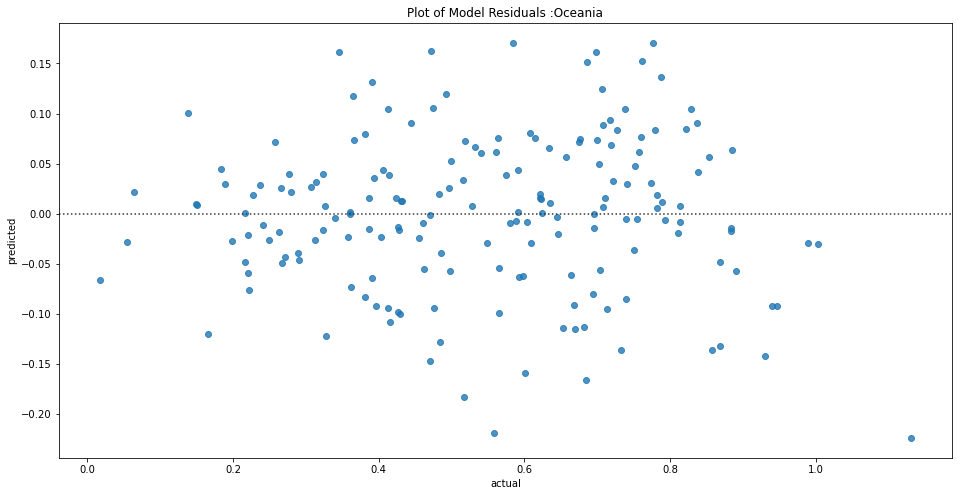

In [65]:
sarimax_model('Oceania',25)

The model on the Oceania region and using S = 25 is doing the prediction with RMSE = 0.2 for the Oceania region. For the forecasting, it is picking up the increasing trend and seasonality of the data.

## Conclusions and Recommendations

AS conclusion , the SARIMAX model we built is a starting point. It picked up the trend and seasonality in the predictions and forecast. To improve it we can look more on subregions and those regions with high RMSE for outliers.